<a href="https://colab.research.google.com/github/dinaglamshowroom/projet-data_oc/blob/main/projet_4_livrable_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse des ventes d‚Äôune librairie
Apr√®s avoir proc√©d√© au nettoyage et √† la pr√©paration des donn√©es dans la premi√®re partie du projet, nous allons d√©sormais nous concentrer sur l‚Äôanalyse des ventes de l‚Äôentreprise. Cette √©tape a pour objectif de d√©gager les principaux indicateurs de performance (CA, volume, panier moyen), d‚Äôidentifier les profils clients les plus contributifs, ainsi que de mettre en √©vidence les tendances et disparit√©s selon les cat√©gories de produits, l‚Äô√¢ge ou le sexe des acheteurs. L‚Äôanalyse vise ainsi √† fournir une vision claire et structur√©e de l‚Äôactivit√© commerciale, √©tape pr√©alable √† la formulation de recommandations strat√©giques.





>








## 1. Chargement et fusion des donn√©es

 Th√®me automnal activ√© (Matplotlib + Seaborn)


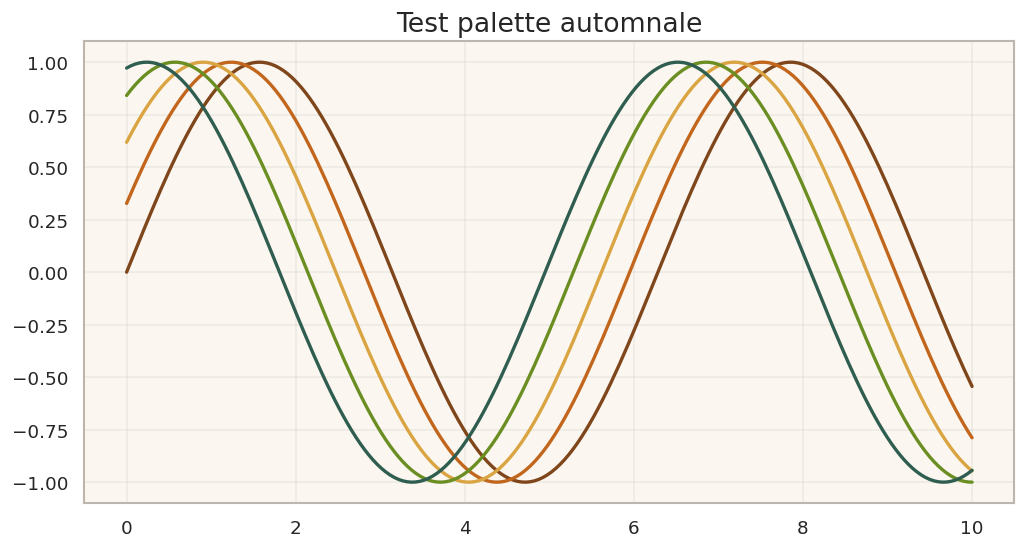

id_prod                       date session_id client_id    month  price  \
0  0_1483 2021-04-10 18:37:28.723910    s_18746    c_4450  2021-04   4.99   
1   2_226 2022-02-03 01:55:53.276402   s_159142     c_277  2022-02  65.75   
2   1_374 2021-09-23 15:13:46.938559    s_94290    c_4270  2021-09  10.71   
3  0_2186 2021-10-17 03:27:18.783634   s_105936    c_4597  2021-10   4.20   
4  0_1351 2021-07-17 20:34:25.800563    s_63642    c_1242  2021-07   8.99   

   categ sex  birth  age    CA  
0      0   f   1977   48  4.99  
1      2   f   2000   25 65.75  
2      1   f   1979   46 10.71  
3      0   m   1963   62  4.20  
4      0   f   1980   45  8.99

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.pylab as pylab
from matplotlib import cycler


AUTUMN_PALETTE = [
    "#7F461B",  # ch√¢taigne
    "#C1661C",  # orange br√ªl√©
    "#D9A441",  # ocre dor√©
    "#6B8E23",  # olive
    "#2F5D50",  # vert pin
    "#8C2F39",  # bordeaux
    "#A46843",  # cannelle
    "#B98B2E",  # moutarde
]

# Seaborn
sns.set_theme(context="notebook", style="whitegrid", palette=AUTUMN_PALETTE)

# Matplotlib (sync palette + r√©glages lisibles)
plt.rcParams.update({
    "figure.figsize": (10, 5),
    "figure.dpi": 120,
    "axes.titlesize": 16,
    "axes.labelsize": 13,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "axes.facecolor": "#FBF7F0",
    "axes.edgecolor": "#BDB6AE",
    "grid.alpha": 0.3,
    "axes.prop_cycle": cycler(color=AUTUMN_PALETTE),  # üëà couleurs auto pour plt.plot/hist
})

print(" Th√®me automnal activ√© (Matplotlib + Seaborn)")


# Exemple de test : plusieurs courbes devraient avoir des couleurs automnales diff√©rentes
import numpy as np
x = np.linspace(0, 10, 200)
for i in range(5):
    plt.plot(x, np.sin(x + i/3), linewidth=2)
plt.title("Test palette automnale")
plt.show()


# Conversion des dates
df_transactions['date'] = pd.to_datetime(df_transactions['date'])

# Fusion des tables
df = df_transactions.merge(df_products, on='id_prod', how='left')
df = df.merge(df_customers, on='client_id', how='left')

# Cr√©ation du chiffre d'affaires (CA)
df['CA'] = df['price']
df['month'] = df['date'].dt.to_period('M')
df.head()

In [ ]:
#autorisation d'acces au google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

#importation des donn√©es depuis un ficher dans google drive
import os, glob

DATA_DIR = "/content/drive/MyDrive/Projet_P4/Data_p4_clean"
csv_files = glob.glob(os.path.join(DATA_DIR, "*.csv"))

print("Fichiers CSV trouv√©s :")
for f in csv_files:
    print(f)

# Charger tous les CSV dans un dictionnaire
import pandas as pd
dfs = {f.split("/")[-1]: pd.read_csv(f) for f in csv_files}

Mounted at /content/drive
Fichiers CSV trouv√©s :
/content/drive/MyDrive/Projet_P4/Data_p4_clean/transactions_clean.csv
/content/drive/MyDrive/Projet_P4/Data_p4_clean/transactions_final.csv
/content/drive/MyDrive/Projet_P4/Data_p4_clean/customers_final.csv
/content/drive/MyDrive/Projet_P4/Data_p4_clean/products_final.csv
/content/drive/MyDrive/Projet_P4/Data_p4_clean/customers_clean.csv
/content/drive/MyDrive/Projet_P4/Data_p4_clean/products_clean.csv


**Configuration Pandas**

In [ ]:

# Afficher toutes les colonnes sans troncature
pd.set_option("display.max_columns", None)
# Limiter le nombre de lignes affich√©es
pd.set_option("display.max_rows", 100)
# Formater les floats pour plus de lisibilit√©
pd.set_option("display.float_format", lambda x: "%.2f" % x)

**Cr√©ation de la table de fait df_tf**

##Cr√©ation de la mega DataFrame (df_tf)

Sachant que:

* transactions = table de faits (chaque ligne = un achat)

* products = table de dimensions (prix, cat√©gorie des produits)

* customers = table de dimensions (sexe, date de naissance des clients)

Nous allons cr√©√© une table de faits enrichie en joignant les 3 dataframes. On obtient alors une seule mega DataFrame (df_tf) qui contient :

* Grain : une ligne = une transaction.

* Mesures : prix, CA, volume.

* Dimensions : tout ce qui d√©crit la transaction (produit, cat√©gorie, client, sexe, √¢ge, date‚Ä¶).


In [ ]:
#appeler et renommer les dataframes
df_customers= dfs["customers_clean.csv"]
df_products = dfs["products_clean.csv"]
df_transactions = dfs["transactions_clean.csv"]

In [ ]:


# Assurer des cha√Ænes propres (d√©j√† fait, mais proprement pour √©viter l‚Äôavertissement)
df_transactions.loc[:, "id_prod"] = df_transactions["id_prod"].astype(str).str.strip()
df_products.loc[:, "id_prod"] = df_products["id_prod"].astype(str).str.strip()

print("client_id unique dans customers ?", df_customers["client_id"].is_unique)
print("nid_prod est unique ?", df_products["id_prod"].is_unique)

# --- Doublons r√©els dans transactions ---
print("Doublons exacts de lignes transactions :", df_transactions.duplicated().sum())

# --- Doublons r√©els dans customers ---
print("Doublons exacts de lignes customers :", df_customers.duplicated().sum())

# --- Doublons r√©els dans products ---
print("Doublons exacts de lignes products :", df_products.duplicated().sum())

# Clients r√©f√©renc√©s dans transactions mais absents de customers (probl√®me d'int√©grit√©)
invalid_clients = set(df_transactions["client_id"]) - set(df_customers["client_id"])
print("Clients dans transactions mais pas dans customers :", len(invalid_clients))

# Produits r√©f√©renc√©s dans transactions mais absents de customers (probl√®me d'int√©grit√©)
invalid_products = set(df_transactions["id_prod"]) - set(df_products["id_prod"])
print("Produits dans transactions mais pas dans products :", len(invalid_products))

# V√©rifier que des lignes entieres ne soient dupliqu√©es
print("Doublons exacts de lignes transactions :", df_transactions.duplicated().sum())

df_customers = df_customers[(df_customers.client_id != 'ct_0') & (df_customers.client_id != 'ct_1')]

client_id unique dans customers ? True
nid_prod est unique ? True
Doublons exacts de lignes transactions : 0
Doublons exacts de lignes customers : 0
Doublons exacts de lignes products : 0
Clients dans transactions mais pas dans customers : 0
Produits dans transactions mais pas dans products : 0
Doublons exacts de lignes transactions : 0


In [ ]:
#Conversion des valeurs de la colonne 'date' dans le bon format date (m√©thode .to_datetime()),
df_transactions["date"] = pd.to_datetime(
    df_transactions["date"],
    format="%Y-%m-%d %H:%M:%S.%f",
    errors="coerce"
)
df_transactions['month'] = df_transactions['date'].dt.to_period('M')


In [ ]:
# Jointures de la "megadataframe" table de faits
df_tf = (
    df_transactions
      .merge(df_products,  on="id_prod",    how="left")
      .merge(df_customers, on="client_id",  how="left")
)
df_tf.head()

id_prod                       date session_id client_id    month  price  \
0  0_1483 2021-04-10 18:37:28.723910    s_18746    c_4450  2021-04   4.99   
1   2_226 2022-02-03 01:55:53.276402   s_159142     c_277  2022-02  65.75   
2   1_374 2021-09-23 15:13:46.938559    s_94290    c_4270  2021-09  10.71   
3  0_2186 2021-10-17 03:27:18.783634   s_105936    c_4597  2021-10   4.20   
4  0_1351 2021-07-17 20:34:25.800563    s_63642    c_1242  2021-07   8.99   

   categ sex  birth  age  
0      0   f   1977   48  
1      2   f   2000   25  
2      1   f   1979   46  
3      0   m   1963   62  
4      0   f   1980   45

# Analyse des donn√©es

L‚Äôanalyse suivra une d√©marche progressive, r√©pondant aux exigences fix√©es :

**Exploration descriptive des donn√©es**

Pr√©sentation des principales variables disponibles (quantitatives et qualitatives).

Calcul d‚Äôindicateurs de tendance centrale et de dispersion (moyenne, m√©diane, √©cart-type, minimum, maximum).

**Analyse de la distribution des ventes**

  - √âtude de la concentration du chiffre d‚Äôaffaires par client et par produit.

  - Construction d‚Äôune courbe de Lorenz et calcul de l‚Äôindice de Gini pour mesurer l‚Äôin√©galit√© de r√©partition des ventes.

**Visualisation des donn√©es**

  - R√©alisation de repr√©sentations graphiques vari√©es :

  - Histogrammes (ex. distribution des prix, des √¢ges).

  - Bo√Ætes √† moustaches (boxplots) pour d√©tecter valeurs extr√™mes et comparer des groupes.

  - S√©ries temporelles (√©volution des ventes dans le temps).


##Exploration descriptive des donn√©es

###KPIs globaux

In [ ]:


# ======================
# 1. KPIs globaux
# ======================
print("=== KPIs GLOBAUX ===")
print("Nombre total de transactions :", len(df_tf))
print("Nombre de clients uniques :", df_tf["client_id"].nunique())
print("Nombre de produits distincts vendus :", df_tf["id_prod"].nunique())
print("CA total :", df_tf["price"].sum())

=== KPIs GLOBAUX ===
Nombre total de transactions : 336713
Nombre de clients uniques : 8600
Nombre de produits distincts vendus : 3264
CA total : 5796577.7700000005


Avec 336‚ÄØ713 transactions r√©alis√©es par 8‚ÄØ600 clients uniques, l'entreprise a g√©n√©r√© un chiffre d'affaires total de 5,8 millions d'euros en vendant 3‚ÄØ264 produits distincts."

## 2. Statistiques descriptives du chiffre d‚Äôaffaires

In [ ]:
# Statistiques de tendance centrale et dispersion
stats = df_tf['price'].describe()
IQR = stats['75%'] - stats['25%']
print(stats)
print(f'IQR : {IQR:.2f}')




count   336713.00
mean        17.22
std         17.86
min          0.62
25%          8.61
50%         13.90
75%         18.99
max        300.00
Name: price, dtype: float64
IQR : 10.38


In [ ]:
lower_bound = stats['25%'] - 1.5 * IQR
upper_bound = stats['75%'] + 1.5 * IQR
outliers = df_tf[(df_tf['price'] < lower_bound) | (df_tf['price'] > upper_bound)]
filtered_df = df_tf[(df_tf['price'] >= lower_bound) & (df_tf['price'] <= upper_bound)]
filtered_df.head(5)

id_prod                       date session_id client_id    month  price  \
0  0_1483 2021-04-10 18:37:28.723910    s_18746    c_4450  2021-04   4.99   
2   1_374 2021-09-23 15:13:46.938559    s_94290    c_4270  2021-09  10.71   
3  0_2186 2021-10-17 03:27:18.783634   s_105936    c_4597  2021-10   4.20   
4  0_1351 2021-07-17 20:34:25.800563    s_63642    c_1242  2021-07   8.99   
5  0_1085 2021-09-15 05:47:48.215162    s_90139    c_2526  2021-09   3.99   

   categ sex  birth  age  
0      0   f   1977   48  
2      1   f   1979   46  
3      0   m   1963   62  
4      0   f   1980   45  
5      0   f   1982   43

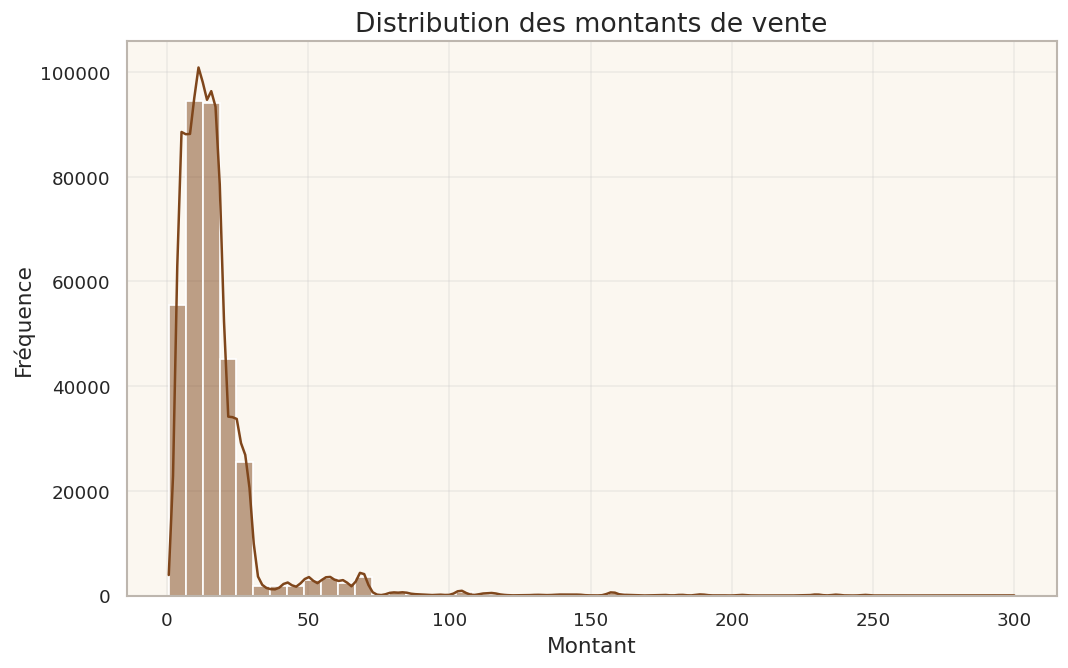

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution des montants de vente')
plt.xlabel('Montant')
plt.ylabel('Fr√©quence')
plt.show()

**Interpr√©tation :** Les prix sont assez vari√©s, avec un maximum (300‚ÄØ‚Ç¨) bien plus √©lev√© que la moyenne (17,22‚ÄØ‚Ç¨), ce qui sugg√®re des outliers.

L‚ÄôIQR de 10,38‚ÄØ‚Ç¨ montre une dispersion mod√©r√©e entre les prix du 1er et 3e quartile (les 50 % centraux).

La m√©diane (13,90‚ÄØ‚Ç¨) est inf√©rieure √† la moyenne ‚Üí la distribution des prix est probablement asym√©trique vers les valeurs hautes (pr√©sence de produits chers).

###Analyse temporelle ( par mois)

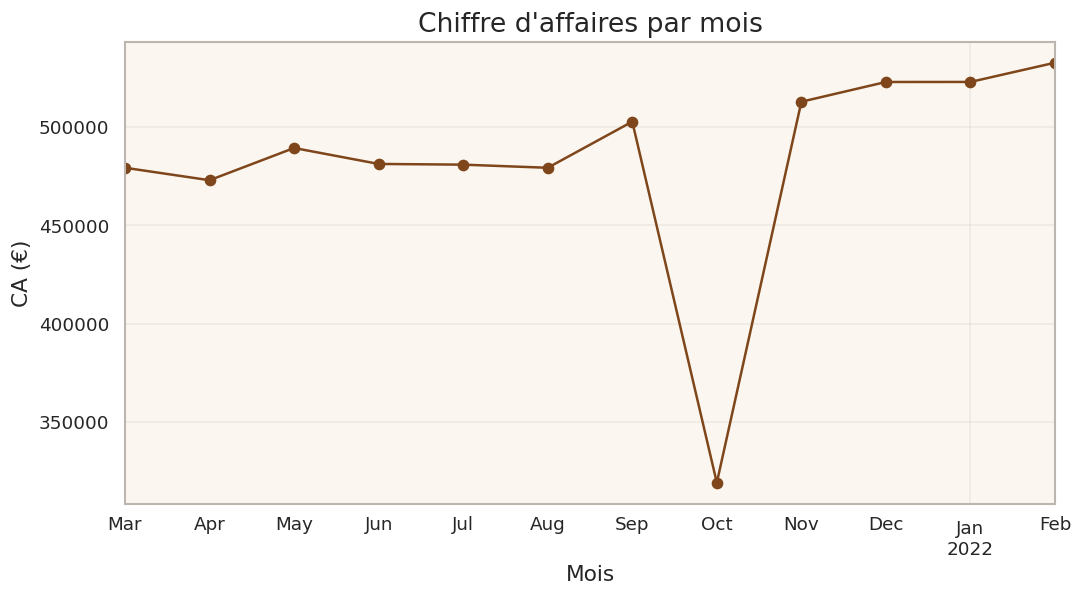

In [ ]:
# ======================
# 2. Analyse temporelle
# ======================
df_tf["month"] = df_tf["date"].dt.to_period("M")
ca_by_month = df_tf.groupby("month")["price"].sum()

plt.figure(figsize=(10,5))
ca_by_month.plot(kind="line", marker="o", title="Chiffre d'affaires par mois")
plt.ylabel("CA (‚Ç¨)") #D√©finit axe des ordon√©es
plt.xlabel("Mois") #D√©finit axe des abcysses
plt.show()

on remarque une incoh√©rence au mois d'octobre, on va donc essayer de comprendre ce qui ce passe durant ce mois: cr√©ation d'une df cibl√©e

In [ ]:
# CA mensuel (ann√©e-mois, tri√©)
df_ca_mensuel = (df_tf.groupby("month")["price"].sum().to_timestamp())
  # Period -> Timestamp pour trac√©s

print(df_ca_mensuel)                 # vision globale (2021-05 ‚Üí 2022-02)
print("\nPlus pr√©cis√©ment: CA Oct 2021 =", df_ca_mensuel.loc["2021-10-01"])  # contr√¥le cibl√©

month
2021-03-01   479312.03
2021-04-01   472980.72
2021-05-01   489367.95
2021-06-01   481257.94
2021-07-01   480898.66
2021-08-01   479305.19
2021-09-01   502771.28
2021-10-01   319159.96
2021-11-01   512890.17
2021-12-01   522937.68
2022-01-01   522955.31
2022-02-01   532740.88
Freq: MS, Name: price, dtype: float64

Plus pr√©cis√©ment: CA Oct 2021 = 319159.96


####*analyse des transaction du mois d'octobre*

In [ ]:
# Diagnostic compl√©mentaire sur Octobre 2021
oct21_vol = df_tf[df_tf["month"] == "2021-10"]

print("Transactions Oct 2021 :", oct21_vol.shape) #(nombre de transaction,nb variables conserv√©es)
print(oct21_vol["price"].describe())       # prix anormaux ?

Transactions Oct 2021 : (21577, 10)
count   21577.00
mean       14.79
std        17.54
min         0.62
25%         6.99
50%        11.03
75%        15.99
max       247.22
Name: price, dtype: float64


In [ ]:
# Prix moyen par mois
prix_moyen_mensuel = df_tf.groupby("month")["price"].mean()
print(prix_moyen_mensuel)


month
2021-03   16.78
2021-04   16.65
2021-05   17.33
2021-06   17.95
2021-07   19.46
2021-08   18.72
2021-09   15.12
2021-10   14.79
2021-11   18.14
2021-12   16.13
2022-01   17.84
2022-02   18.02
Freq: M, Name: price, dtype: float64


In [ ]:
# CA moyen par transaction en octobre vs autres
print("CA moyen Oct 2021 :", oct21_vol["price"].mean())
print("CA moyen autres mois :", df_tf[df_tf["month"] != "2021-10"]["price"].mean())

CA moyen Oct 2021 : 14.791674468183714
CA moyen autres mois : 17.38112373705321


Octobre 2021 pr√©sente un chiffre d‚Äôaffaires exceptionnellement bas: 319 k‚Ç¨ vs ~ 490 k‚Ç¨ en moyenne mensuelle. La chute est de ‚àí35 % par rapport √† la moyenne mensuelle. Cela correspond √† un manque d‚Äôenviron 171 k‚Ç¨, soit ~3 % du CA total sur la p√©riode.

L‚Äôanalyse d√©taill√©e montre que le prix moyen reste stable: ~15 ‚Ç¨, mais que le nombre de transactions enregistr√©es 21 577 est nettement inf√©rieur √† celui des mois voisins: ~30‚Äì35k.

Cela reste faible √† l‚Äô√©chelle globale, mais significatif dans une analyse mensuelle, car le mois d‚Äôoctobre appara√Æt artificiellement comme une contre-performance.

Cette baisse est donc sans doute li√©e √† un volume de transactions incomplet (probablement d√ª √† un √† un volume de transactions incomplet (probablement d√ª √† un probl√®me de collecte ou d‚Äôint√©gration des donn√©es)
√† un incident op√©rationnel ( indisponibilit√© du site, bug technique ayant limit√© les ventes etc...)
et non √† une variation commerciale r√©elle.




In [ ]:
# Cat√©gories globales (sur toute la p√©riode)
all_categ = set(df_tf["categ"].dropna().unique())

# Cat√©gories pr√©sentes en octobre 2021
oct_categ = set(
    df_tf.loc[df_tf["date"].dt.to_period("M") == "2021-10", "categ"].dropna().unique()
)

# Cat√©gories manquantes en octobre
missing_categ = all_categ - oct_categ

print("Toutes cat√©gories :", all_categ)
print("Cat√©gories en octobre :", oct_categ)
print("Cat√©gories manquantes en octobre :", missing_categ)


Toutes cat√©gories : {np.int64(0), np.int64(1), np.int64(2)}
Cat√©gories en octobre : {np.int64(0), np.int64(1), np.int64(2)}
Cat√©gories manquantes en octobre : set()


In [ ]:
# 0) Copie + jour calendaire
df_tmp = df_tf.copy()
df_tmp["day"] = df_tmp["date"].dt.floor("D")

# 1) Restreindre √† Octobre 2021
mask_oct = df_tmp["day"].between("2021-10-01", "2021-10-31", inclusive="both")
df_oct = df_tmp.loc[mask_oct].copy()

# 2) (Option) s'assurer que categ est bien num√©rique si n√©cessaire
# df_oct["categ"] = pd.to_numeric(df_oct["categ"], errors="coerce")




In [ ]:
pivot_oct = (
    df_oct.pivot_table(index="day", columns="categ", values="id_prod", aggfunc="count", fill_value=0)
)
pivot_oct["nb_tx_total"] = pivot_oct.sum(axis=1)
print(pivot_oct)

categ         0    1   2  nb_tx_total
day                                  
2021-10-01  662  344  37         1043
2021-10-02  660    0  27          687
2021-10-03  647    0  30          677
2021-10-04  600    0  37          637
2021-10-05  594    0  38          632
2021-10-06  701    0  25          726
2021-10-07  597    0  26          623
2021-10-08  669    0  44          713
2021-10-09  640    0  35          675
2021-10-10  599    0  28          627
2021-10-11  642    0  42          684
2021-10-12  632    0  29          661
2021-10-13  633    0  36          669
2021-10-14  605    0  39          644
2021-10-15  632    0  37          669
2021-10-16  661    0  45          706
2021-10-17  625    0  44          669
2021-10-18  608    0  37          645
2021-10-19  565    0  37          602
2021-10-20  554    0  42          596
2021-10-21  610    0  43          653
2021-10-22  571    0  34          605
2021-10-23  555    0  47          602
2021-10-24  584    0  44          628
2021-10-25  

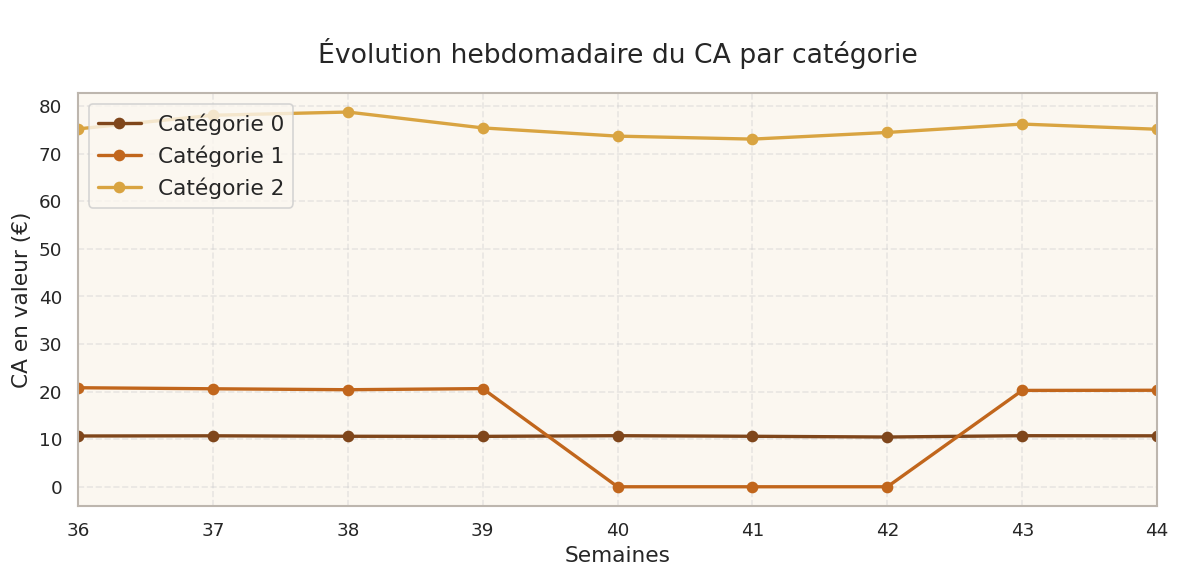

In [ ]:
# --- Pr√©paration des donn√©es ---
d = df_tf.copy()

# Semaine ISO (1..53) en entier
d['semaine'] = d['date'].dt.isocalendar().week.astype(int)

# S'assurer que categ est bien entier (si n√©cessaire)
d['categ'] = pd.to_numeric(d['categ'], errors='coerce').astype('Int64')

# Agr√©gation hebdo x cat√©gorie (moyenne comme dans ton code, mets .sum() si tu veux le total)
weekly = (
    d.groupby(['semaine', 'categ'])['price']
     .mean()                             # <- .sum() pour le CA total hebdo
     .reset_index()
)

# Filtre semaines 36..44 inclus
weekly = weekly[(weekly['semaine'] >= 36) & (weekly['semaine'] <= 44)]

# Pivot pour avoir 1 colonne par cat√©gorie
pivot = weekly.pivot(index='semaine', columns='categ', values='price').sort_index()

# S'assurer que toutes les semaines existent (36..44), NaN -> 0
weeks = pd.Index(range(36, 45), name='semaine')
pivot = pivot.reindex(weeks).fillna(0)

# Ordre des cat√©gories attendu (0,1,2) si pr√©sent
cats = [c for c in [0, 1, 2] if c in pivot.columns]

# --- Trac√© en courbes ---
fig, ax = plt.subplots()

for i, c in enumerate(cats):
    ax.plot(
        pivot.index, pivot[c],
        marker='o', linewidth=2,
        label=f'Cat√©gorie {c}'
    )

ax.set_title('\n√âvolution hebdomadaire du CA par cat√©gorie', y=1.05, linespacing=1)
ax.set_xlabel('Semaines')
ax.set_ylabel('CA en valeur (‚Ç¨)')
ax.grid(True, linestyle='--', alpha=0.4)
ax.set_xlim(36, 44)
ax.legend(loc='upper left', fontsize=13)

plt.tight_layout()
plt.show()

L‚Äôanalyse montre une perte de donn√©es sur la cat√©gorie 1 entre le 2 et le 28 octobre 2021, alors que cette cat√©gorie est pr√©sente aux fr√©quences habituelles sur les autres p√©riodes.

Deux options √©taient envisageables :

Corriger octobre en imputant les donn√©es manquantes par interpolation (moyenne entre septembre et novembre).

Exclure octobre des calculs afin de ne conserver que des valeurs r√©ellement observ√©es.

Nous avons choisi la seconde option : supprimer le mois d‚Äôoctobre 2021 des analyses. Cela permet de travailler sur une base de 11 mois complets refl√©tant un chiffre d‚Äôaffaires r√©el, sans introduire d‚Äôestimation artificielle.

In [ ]:
df = df_tf[~df_tf["date"].dt.to_period("M").eq("2021-10")].copy()

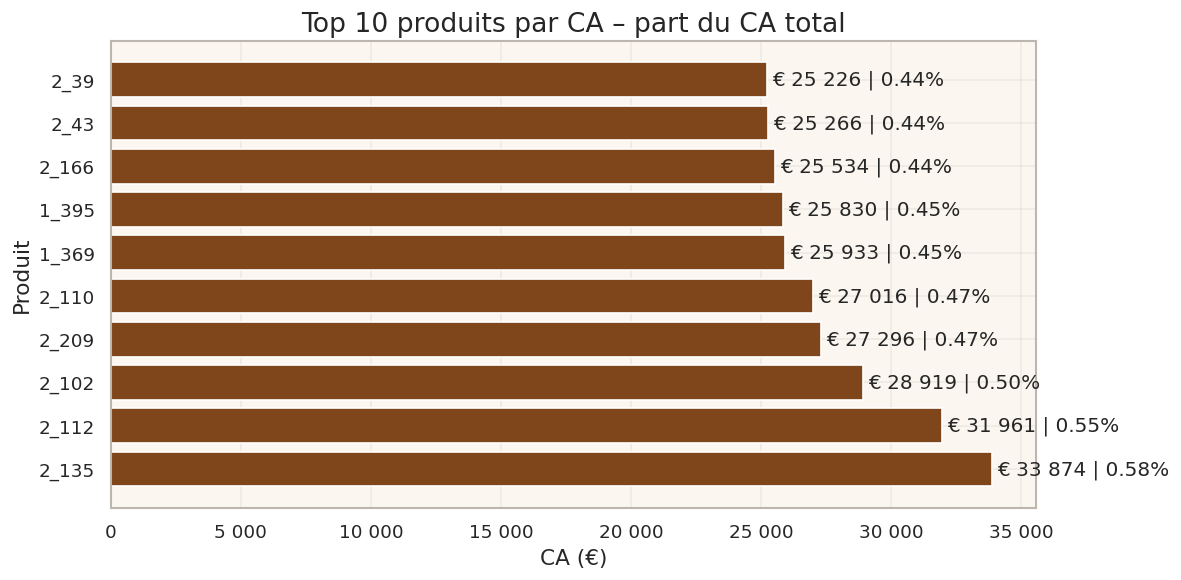

In [ ]:
# ======================
# 3. Analyse par produit
# ======================


# 1) Top 10 produits par CA
top_products = (df_tf.groupby("id_prod")["price"]
                .sum()
                .sort_values(ascending=False)
                .head(10))

# 2) Petit tableau pour calculer la part du CA total
ca_total = df_tf["price"].sum()
top_df = top_products.to_frame(name="price")
top_df["pct_total"] = top_df["price"] / ca_total  # part dans le CA global

# 3) Trac√©
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.barh(y=top_df.index.astype(str), width=top_df["price"])

# 4) Annotations sans boucle: on fabrique un vecteur de textes
labels_text = (
    top_df["price"].apply(lambda v: f"‚Ç¨ {v:,.0f}".replace(",", " "))
    + " | "
    + top_df["pct_total"].apply(lambda p: f"{p:.2%}")
).values

# (matplotlib >= 3.4) pour coller les labels au bout des barres
ax.bar_label(bars, labels=labels_text, label_type="edge", padding=3)

ax.set_title("Top 10 produits par CA ‚Äì part du CA total")
ax.set_xlabel("CA (‚Ç¨)")
ax.set_ylabel("Produit")
ax.xaxis.set_major_formatter(lambda x, pos: f"{x:,.0f}".replace(",", " "))
plt.tight_layout()
plt.show()

In [ ]:
ptt = df['price']
ptt.value_counts().sort_values().tail(1);
ptt_0 = df.loc[df['categ'] == 0, 'price']
ptt_0.value_counts().sort_values().tail(1);
ptt_1 = df.loc[df['categ'] == 1, 'price']
ptt_1.value_counts().sort_values().tail(1);
ptt_2 = df.loc[df['categ'] == 2, 'price']
ptt_2.value_counts().sort_values().tail(1);

In [ ]:
ptt = df['price']

ptt_0 = df.loc[df['categ'] == 0, 'price']
ptt_1 = df.loc[df['categ'] == 1, 'price']
ptt_2 = df.loc[df['categ'] == 2, 'price']

# --- V√©rification des prix les plus fr√©quents (facultatif) ---
print("Prix le plus fr√©quent (tous produits) :", ptt.value_counts().sort_values().tail(1))
print("Prix le plus fr√©quent (cat√©gorie 0) :", ptt_0.value_counts().sort_values().tail(1))
print("Prix le plus fr√©quent (cat√©gorie 1) :", ptt_1.value_counts().sort_values().tail(1))
print("Prix le plus fr√©quent (cat√©gorie 2) :", ptt_2.value_counts().sort_values().tail(1))


Prix le plus fr√©quent (tous produits) : price
15.99    9957
Name: count, dtype: int64
Prix le plus fr√©quent (cat√©gorie 0) : price
4.99    8422
Name: count, dtype: int64
Prix le plus fr√©quent (cat√©gorie 1) : price
15.99    4780
Name: count, dtype: int64
Prix le plus fr√©quent (cat√©gorie 2) : price
68.99    1009
Name: count, dtype: int64


Les 10 produits les plus vendus g√©n√®rent chacun entre 25 k‚Ç¨ et 34 k‚Ç¨ sur la p√©riode, soit 0,44 % √† 0,58 % du CA total. Cela montre que le chiffre d‚Äôaffaires n‚Äôest pas concentr√© sur quelques r√©f√©rences, mais r√©parti sur un tr√®s grand nombre de produits. M√™me le produit leader (2_135) ne repr√©sente que 0,6 % du CA global.


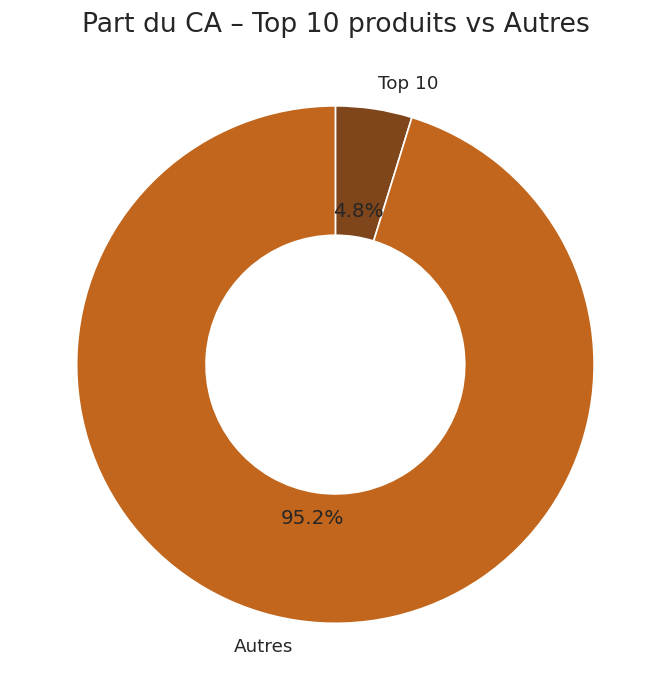

In [ ]:
# Donut Top10 vs Autres (contexte global)
top10_sum = top_products.sum()
others_sum = ca_total - top10_sum

fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    [top10_sum, others_sum],
    labels=["Top 10", "Autres"],
    autopct=lambda p: f"{p:.1f}%",
    startangle=90,
    counterclock=False
)
# Donut (anneau)
for w in wedges:
    w.set_width(0.5)

ax.set_title("Part du CA ‚Äì Top 10 produits vs Autres")
plt.tight_layout()
plt.show()

In [ ]:
# 1. CA par cat√©gorie
ca_by_categ = df.groupby("categ", as_index=False)["price"].sum()

# 2. Effectifs par cat√©gorie
effectif = df['categ'].value_counts().reset_index()
effectif.columns = ["categ", "effectif"]

# 3. Taille totale pour les fr√©quences
n_total = len(df)
effectif["frequence"] = effectif["effectif"] / n_total

# 4. Fusionner volume + CA
tab = effectif.merge(ca_by_categ, on="categ", how="left").fillna(0)

# 5. Ajouter % du CA total
ca_total = df["price"].sum()
tab["pct_CA"] = tab["price"] / ca_total

# 6. Trier par CA d√©croissant
tab = tab.sort_values("price", ascending=False).reset_index(drop=True)

tab


categ  effectif  frequence      price  pct_CA
0      1    108069       0.34 2213622.09    0.40
1      0    190675       0.61 2030504.71    0.37
2      2     16392       0.05 1233291.01    0.23

In [ ]:
df.groupby("categ")["id_prod"].nunique()

categ
0    2289
1     737
2     236
Name: id_prod, dtype: int64

<Axes: title={'center': 'Nombre de produits uniques par cat√©gorie'}, xlabel='categ'>

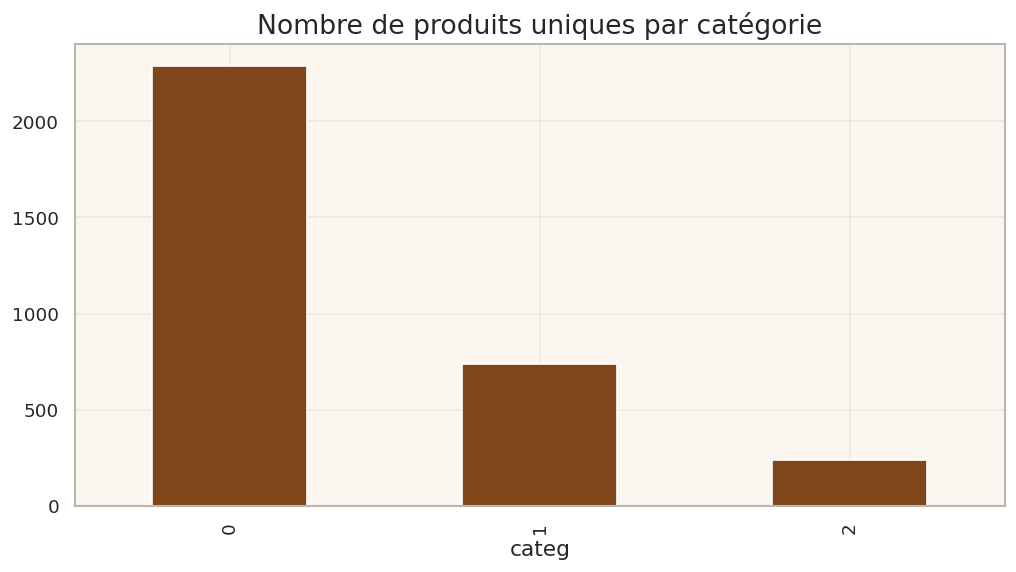

In [ ]:
df.groupby("categ")["id_prod"].nunique().plot(kind="bar", title="Nombre de produits uniques par cat√©gorie")

In [ ]:
# Produits vendus (ceux qui apparaissent dans au moins une session)
produits_vendus = set(df.loc[df["session_id"].notna(), "id_prod"].unique())

# Tous les produits (dans la table)
tous_produits = set(df["id_prod"].unique())

# Produits jamais vendus
produits_non_vendus = tous_produits - produits_vendus

print(f"Nombre de produits jamais vendus : {len(produits_non_vendus)}")
print(f"Produits non vendus : {list(produits_non_vendus)[:10]}")

Nombre de produits jamais vendus : 0
Produits non vendus : []


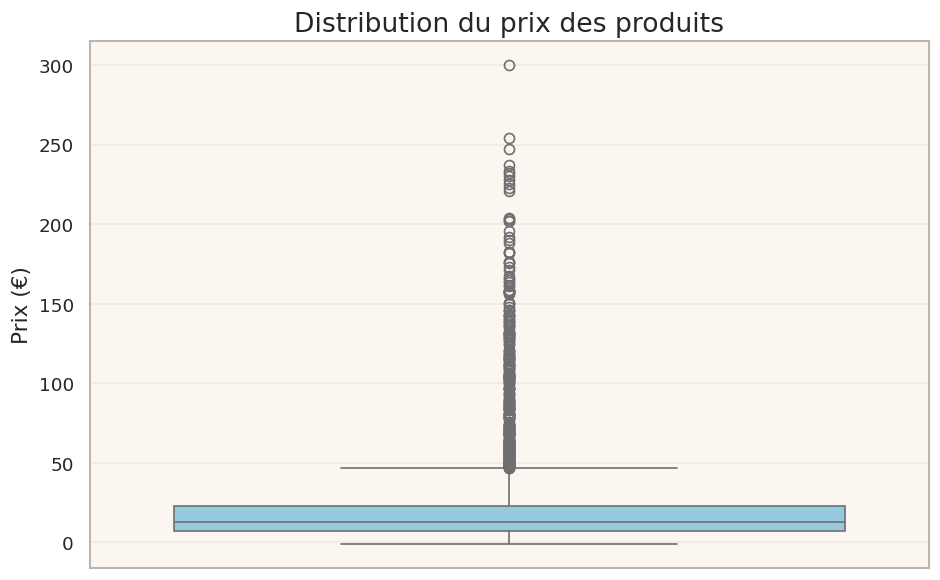

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_products, y="price", color="skyblue", showfliers=True)
plt.title("Distribution du prix des produits")
plt.ylabel("Prix (‚Ç¨)")
plt.xlabel("")
plt.tight_layout()
plt.show()

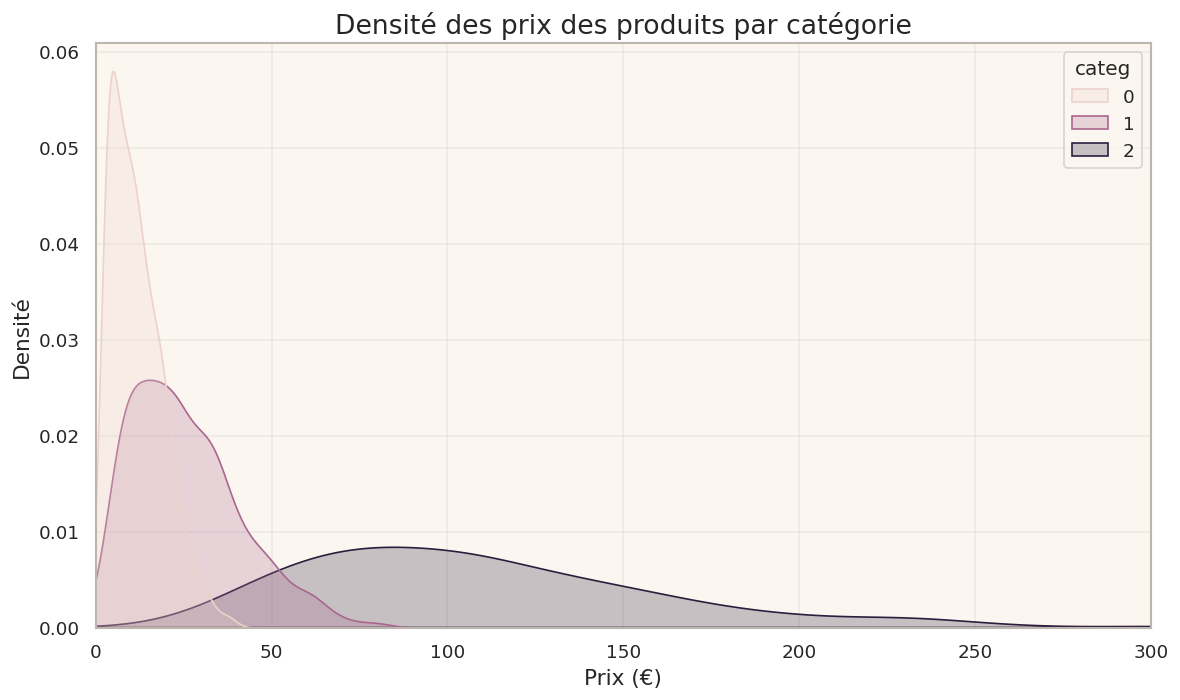

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df_products, x="price", hue="categ", fill=True, common_norm=False)
plt.title("Densit√© des prix des produits par cat√©gorie")
plt.xlabel("Prix (‚Ç¨)")
plt.ylabel("Densit√©")
plt.xlim(0, 300)  # ajuste selon tes valeurs max
plt.tight_layout()
plt.show()

L‚Äôanalyse par cat√©gorie met en √©vidence trois profils distincts :

* **Cat√©gorie 0** ‚Äì Produits ‚Äúcourants‚Äù
Produits √† faible prix unitaire et fort volume : ils repr√©sentent 62 % des ventes mais seulement 38 % du chiffre d‚Äôaffaires.
Les boxplots montrent une distribution de prix resserr√©e autour de la m√©diane (~10 ‚Ç¨), avec peu de dispersion.
 **Ces articles constituent le socle du volume, mais contribuent modestement √† la rentabilit√©.**

* **Cat√©gorie 1** ‚Äì Produits ‚Äú√©quilibr√©s‚Äù
Repr√©sentent 33 % des ventes pour 39 % du CA.
Leurs prix sont mod√©r√©s (m√©diane autour de 15 ‚Ç¨) et plus homog√®nes, traduisant un positionnement milieu de gamme.
**Cette cat√©gorie agit comme un stabilisateur : elle combine volume r√©gulier et marge moyenne.**

* **Cat√©gorie 2** ‚Äì Produits √† forte valeur
Peu vendus (5 % du volume) mais contribuent √† 23 % du CA.
Le boxplot r√©v√®le une forte dispersion des prix, avec des valeurs m√©dianes nettement plus √©lev√©es (> 100 ‚Ç¨) et plusieurs outliers dans le haut du spectre (> 200‚Äì300 ‚Ç¨).
**Ces produits sont clairement haut de gamme, essentiels √† la rentabilit√© globale malgr√© leur faible fr√©quence d‚Äôachat.**

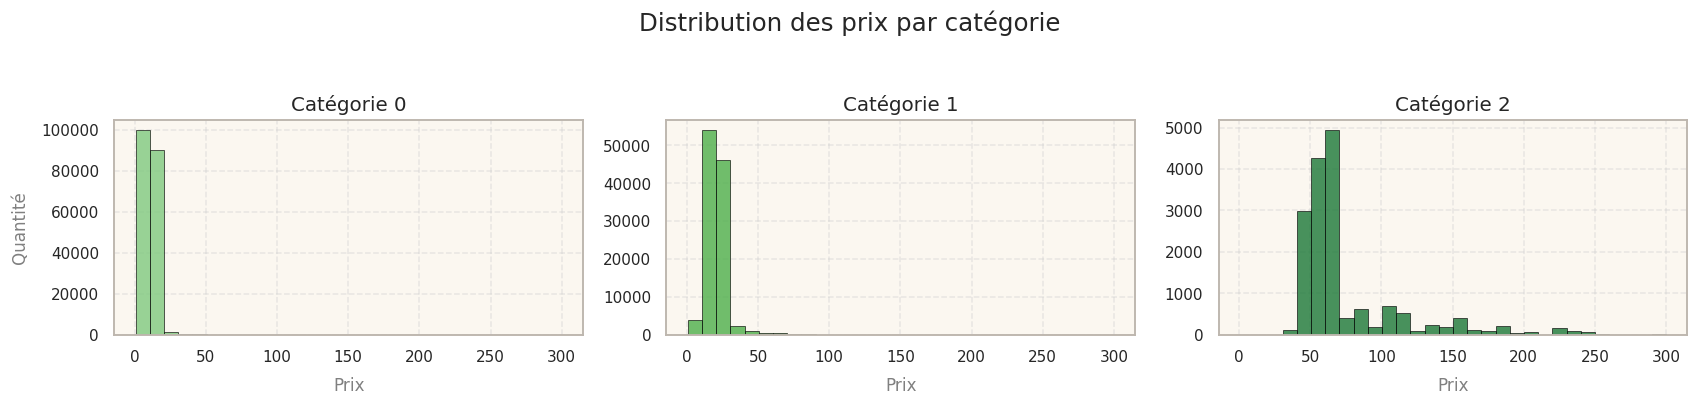

In [ ]:
# Nettoyage l√©ger : garde les lignes avec prix valides
df_ok = df.loc[df["price"].notna()].copy()

# Cat√©gories ordonn√©es (√©vite de supposer 0/1/2)
cats = sorted(df_ok["categ"].dropna().unique())

# Pr√©pare les axes (1 ligne, n colonnes)
fig, axes = plt.subplots(1, len(cats), figsize=(5.2*len(cats), 3.5), dpi=110)

# Si une seule cat√©gorie -> axes n‚Äôest pas un array
if len(cats) == 1:
    axes = np.array([axes])

# Palette simple (verts) ou multicolore selon ton choix
# Ici : 3 teintes de vert, mais on boucle si >3 cat√©gories
base_colors = ['#7fc97f', '#4daf4a', '#1b7837']
colors = [base_colors[i % len(base_colors)] for i in range(len(cats))]

# Bornes de bins homog√®nes sur toutes cat√©gories (comparabilit√©)
pmin = max(0, np.nanmin(df_ok["price"]))
pmax = np.nanmax(df_ok["price"])
bins = np.linspace(pmin, pmax, 31)  # 30 classes

for ax, cat, col in zip(axes.flatten(), cats, colors):
    x = df_ok.loc[df_ok["categ"] == cat, "price"]
    ax.hist(x, bins=bins, alpha=0.8, color=col, edgecolor='black', linewidth=0.5)
    ax.set_title(f'Cat√©gorie {cat}', fontsize=13)
    ax.grid(linestyle='--', alpha=0.4)
    ax.tick_params(labelsize=10, pad=4)
    ax.set_xlabel("Prix", color='gray', labelpad=8, fontsize=11)

# Label Y uniquement sur le premier sous-graphe
axes.flatten()[0].set_ylabel("Quantit√©", color='gray', labelpad=8, fontsize=11)

plt.suptitle("Distribution des prix par cat√©gorie", y=1.05, fontsize=16)
plt.tight_layout()
plt.show()

**Cat√©gorie 0 ‚Äì Produits courants**

Concentration tr√®s forte sur des prix inf√©rieurs √† 20 ‚Ç¨, avec une distribution tr√®s resserr√©e.

Volume tr√®s √©lev√© (plus de 100 000 produits).

‚ûú Produits d‚Äôentr√©e de gamme, √† forte rotation mais faible marge unitaire.

**Cat√©gorie 1 ‚Äì Produits milieu de gamme**

Distribution √©galement concentr√©e en dessous de 50 ‚Ç¨.

Un outlier isol√© autour de 280 ‚Ç¨ indique un produit anormalement cher (probablement une erreur ou un cas exceptionnel).

‚ûú Segment √©quilibr√©, repr√©sentatif d‚Äôune offre de prix standardis√©e.

**Cat√©gorie 2 ‚Äì Produits haut de gamme**

Distribution plus √©tal√©e, avec une m√©diane autour de 80‚Äì100 ‚Ç¨, et des produits allant jusqu‚Äô√† 250‚Äì300 ‚Ç¨.

Volume plus faible, mais valeurs nettement plus √©lev√©es.

‚ûú Produits √† forte valeur ajout√©e, orient√©s rentabilit√©.

####Analyse CA par sexe

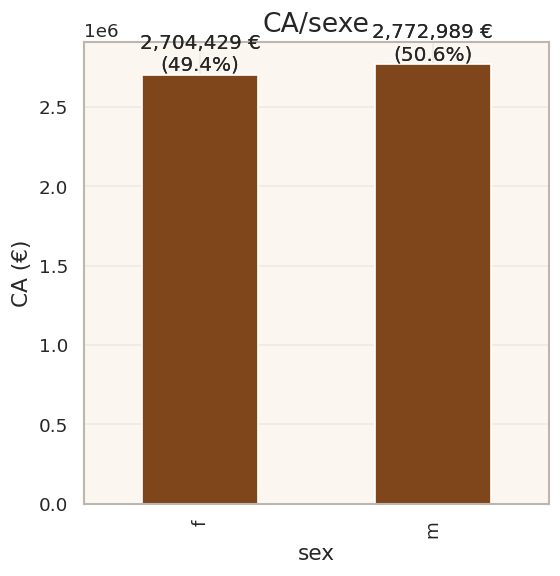

In [ ]:

ca_by_sex = df.groupby("sex")["price"].sum()

#Fr√©quences cumul√©es
tab = tab.sort_values("categ") # tri des valeurs de la variable X (croissant)
tab["F"] = tab["frequence"].cumsum() # cumsum calcule la somme cumul√©e
tab

#diagramme
plt.figure(figsize=(20,4))
ca_by_sex.plot(kind="bar", title="CA parsexe")
plt.ylabel("CA (‚Ç¨)")
plt.xlabel("Sexe")

#ajout des pourcentages
ax = ca_by_sex.plot(kind="bar", figsize=(5,5), title="CA/sexe", legend=False)
ax.set_ylabel("CA (‚Ç¨)")

for p in ax.patches:
    value = p.get_height()
    pct = value / ca_by_sex.sum()
    ax.annotate(f"{value:,.0f} ‚Ç¨\n({pct:.1%})",
                (p.get_x() + p.get_width()/2, value),
                ha="center", va="bottom")
plt.show()

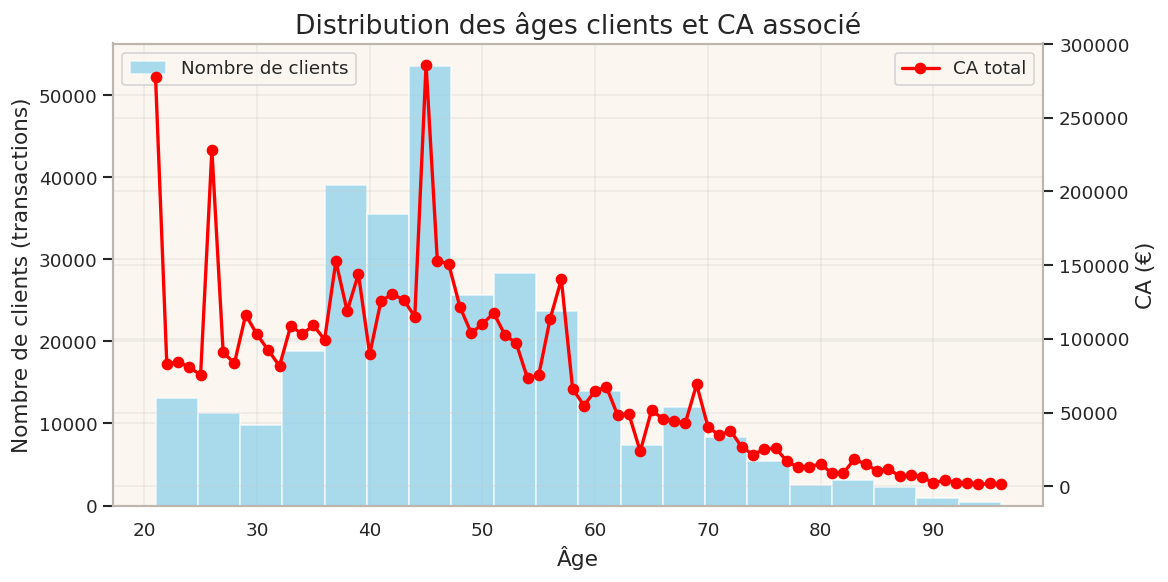

In [ ]:
# Histogramme des effectifs par √¢ge
plt.figure(figsize=(10,5))

ax1 = plt.gca()
df["age"].hist(bins=20, ax=ax1, color="skyblue", alpha=0.7)
ax1.set_title("Distribution des √¢ges clients et CA associ√©")
ax1.set_xlabel("√Çge")
ax1.set_ylabel("Nombre de clients (transactions)")

# Courbe CA total par √¢ge
ax2 = ax1.twinx()
ca_by_age = df.groupby("age")["price"].sum()
ax2.plot(ca_by_age.index, ca_by_age.values, color="red", marker="o", linewidth=2, label="CA total")
ax2.set_ylabel("CA (‚Ç¨)")

# L√©gendes combin√©es
ax1.legend(["Nombre de clients"], loc="upper left")
ax2.legend(["CA total"], loc="upper right")

plt.show()

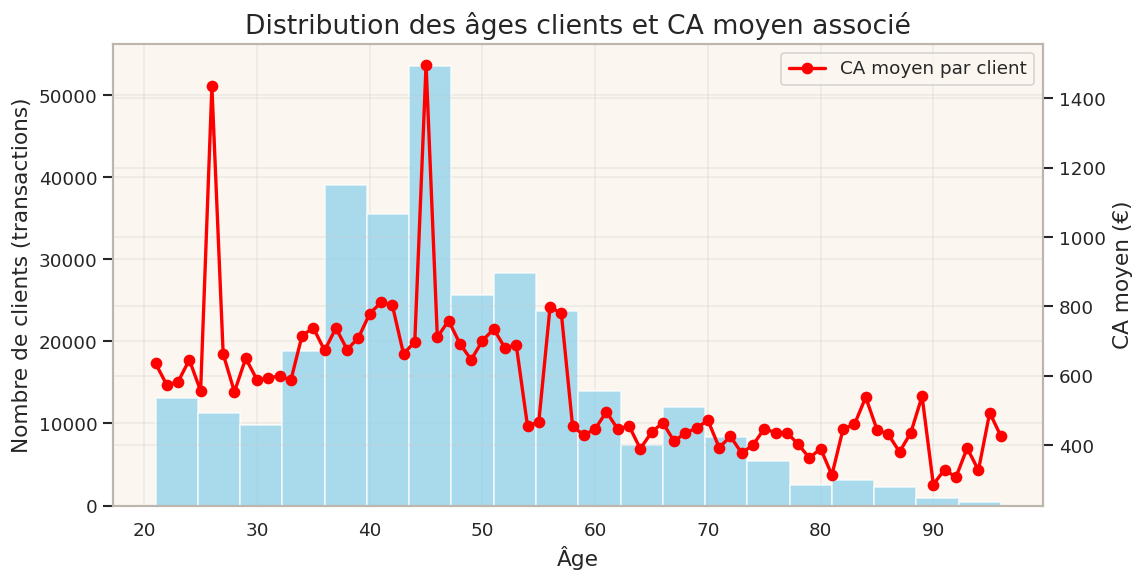

In [ ]:
# CA moyen par √¢ge = CA total / nb de clients distincts par √¢ge
ca_moyen_age = df.groupby("age")["price"].sum() / df.groupby("age")["client_id"].nunique()

plt.figure(figsize=(10,5))
df["age"].hist(bins=20, color="skyblue", alpha=0.7)
plt.title("Distribution des √¢ges clients et CA moyen associ√©")
plt.xlabel("√Çge")
plt.ylabel("Nombre de clients (transactions)")

ax2 = plt.gca().twinx()
ax2.plot(ca_moyen_age.index, ca_moyen_age.values, color="red", marker="o", linewidth=2, label="CA moyen par client")
ax2.set_ylabel("CA moyen (‚Ç¨)")

plt.legend(loc="upper right")
plt.show()


L‚Äôanalyse par √¢ge montre que la client√®le est surtout concentr√©e entre 35 et 50 ans en volume.

En termes de valeur :

Le CA moyen par client est le plus √©lev√© chez les **30‚Äì55 ans**, confirmant qu‚Äôil s‚Äôagit de la cible **principale**.

Les clients plus jeunes (<30 ans) et plus √¢g√©s (>70 ans) d√©pensent significativement moins, ce qui r√©duit leur poids √©conomique malgr√© leur pr√©sence.

Cela sugg√®re que les actions marketing ou de **fid√©lisation** devraient cibler prioritairement les **30‚Äì55 ans**, qui combinent √† la fois volume et rentabilit√©. Mais aussi d'√©tablir une nouvelle strat√©gie pour **attirer fid√©liser** les **jeunes adultes et les seniors.**

###Analyse des prix par categories

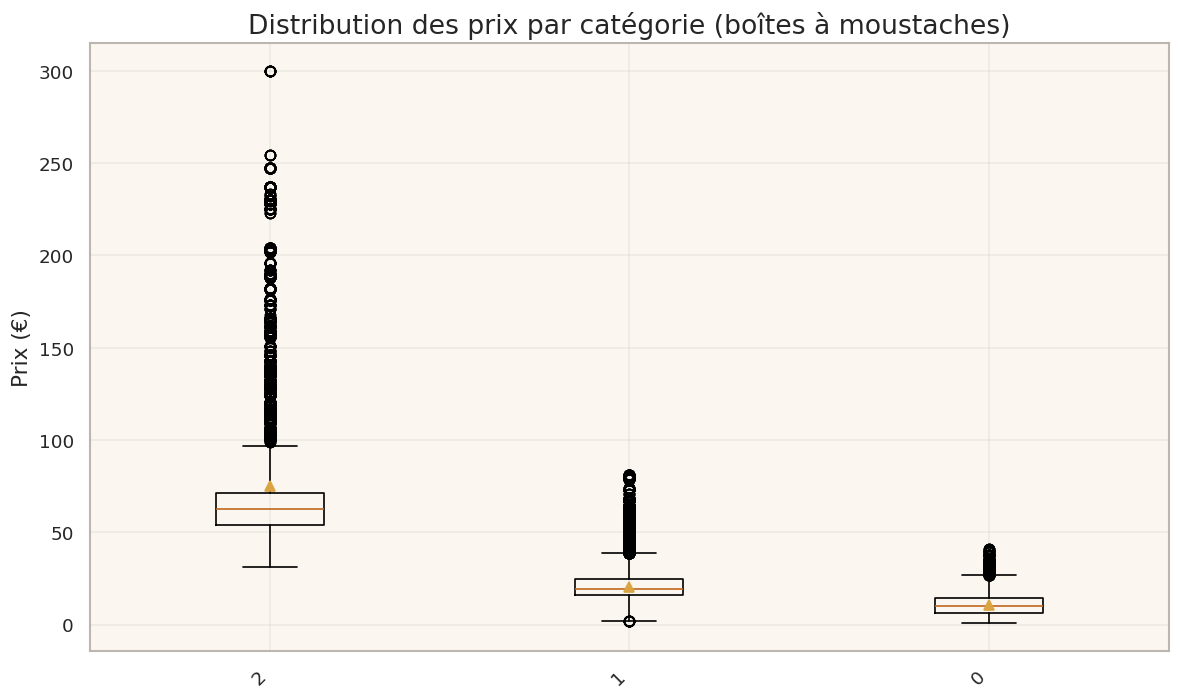

In [ ]:

# Pr√©parer les donn√©es : une liste de s√©ries de prix par cat√©gorie
order = (
    df.groupby("categ")["price"]
         .median()
         .sort_values(ascending=False)
         .index.tolist()
)
data = [df.loc[df["categ"] == c, "price"].dropna().values for c in order]

plt.figure(figsize=(10,6))
bp = plt.boxplot(
    data,
    vert=True,
    patch_artist=False,   # pas de couleur impos√©e
    showfliers=True,      # affiche les outliers
    showmeans=True,       # ligne de moyenne
    whis=1.5
)
plt.xticks(range(1, len(order)+1), order, rotation=45, ha="right")
plt.yscale("linear")      # tu peux passer en 'log' si tr√®s asym√©trique
plt.title("Distribution des prix par cat√©gorie (bo√Ætes √† moustaches)")
plt.ylabel("Prix (‚Ç¨)")
plt.tight_layout()
plt.show()



*  La cat√©gorie 0 regroupe des produits d‚Äôentr√©e de gamme, peu chers ethomog√®nes.


*   La cat√©gorie 1 se situe dans une gamme interm√©diaire, avec des prix plus vari√©s.



*  La cat√©gorie 2 concentre les produits premium, caract√©ris√©s par des prix nettement sup√©rieurs et une forte variabilit√©.


**Cela explique les diff√©rences observ√©es dans la contribution au CA par cat√©gorie car la cat√©gorie 2 g√©n√®re un quart du CA malgr√© seulement 5 % des volumes.**

## 3. Analyse de concentration : Lorenz & Gini

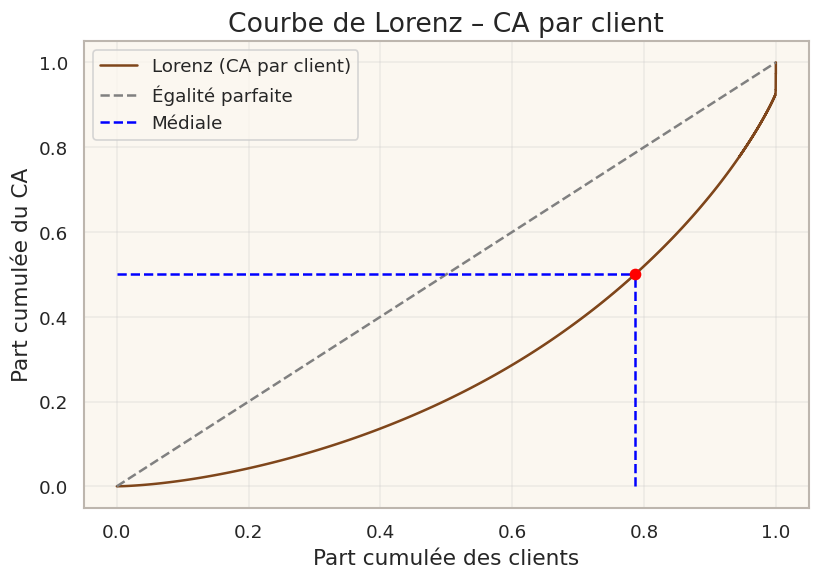

In [ ]:
# CA total par client, tri√©
ca_clients = df.groupby("client_id")["price"].sum().sort_values().values #On calcule le CA total par client.

# 2) Vecteurs x,y avec origine (0,0)
N = len(ca_clients)
x = np.arange(0, N+1) / N                   #g√©n√®re une s√©quence 1, 2, 3, ‚Ä¶ jusqu‚Äôau nombre de clients.
y = np.r_[0.0, ca_clients.cumsum() / ca_clients.sum()]  #ordonn√©e a l'origine #somme cumul√©e du CA en suivant l‚Äôordre tri√©/divise par le total pour obtenir une proportion.

# 3) Trac√© courbe de Lorenz
plt.figure(figsize=(7,5))
plt.plot(x, y, drawstyle="steps-post", label="Lorenz (CA par client)")
plt.plot([0,1], [0,1], color="grey", linestyle="--", label="√âgalit√© parfaite")


#trac√© m√©dial
idx = np.searchsorted(y, 0.5)   # premier indice o√π y >= 0.5
x_medial = x[idx]
y_medial = y[idx]
plt.vlines(x_medial, ymin=0, ymax=y_medial, color='blue', linestyle='--', label='M√©diale')
plt.hlines(y_medial, xmin=0, xmax=x_medial, color='blue', linestyle='--')
plt.scatter([x_medial], [y_medial], color='red', zorder=5)

#label
plt.xlabel("Part cumul√©e des clients")
plt.ylabel("Part cumul√©e du CA")
plt.title("Courbe de Lorenz ‚Äì CA par client")
plt.legend()
plt.tight_layout()
plt.show()

# 4) Indice de Gini (aire sous la courbe)
AUC = np.trapezoid(y, x)      # aire sous la Lorenz
gini = 1 - 2*AUC

In [ ]:
print(f"50% du CA est atteint par environ {x_medial:.2%} de la population.")
print(f"Indice de Gini (CA par client) : {gini:.3f}")

50% du CA est atteint par environ 78.62% de la population.
Indice de Gini (CA par client) : 0.440


Des produits √† forte valeur qui g√©n√®rent beaucoup de CA.

Des clients grands comptes ou tr√®s r√©guliers.

Une strat√©gie commerciale o√π peu de transactions font l‚Äôessentiel du chiffre d‚Äôaffaires.

Pr√©sence d'outlider

## 4. Distribution des ventes

In [ ]:
df["CA"] = df["price"]

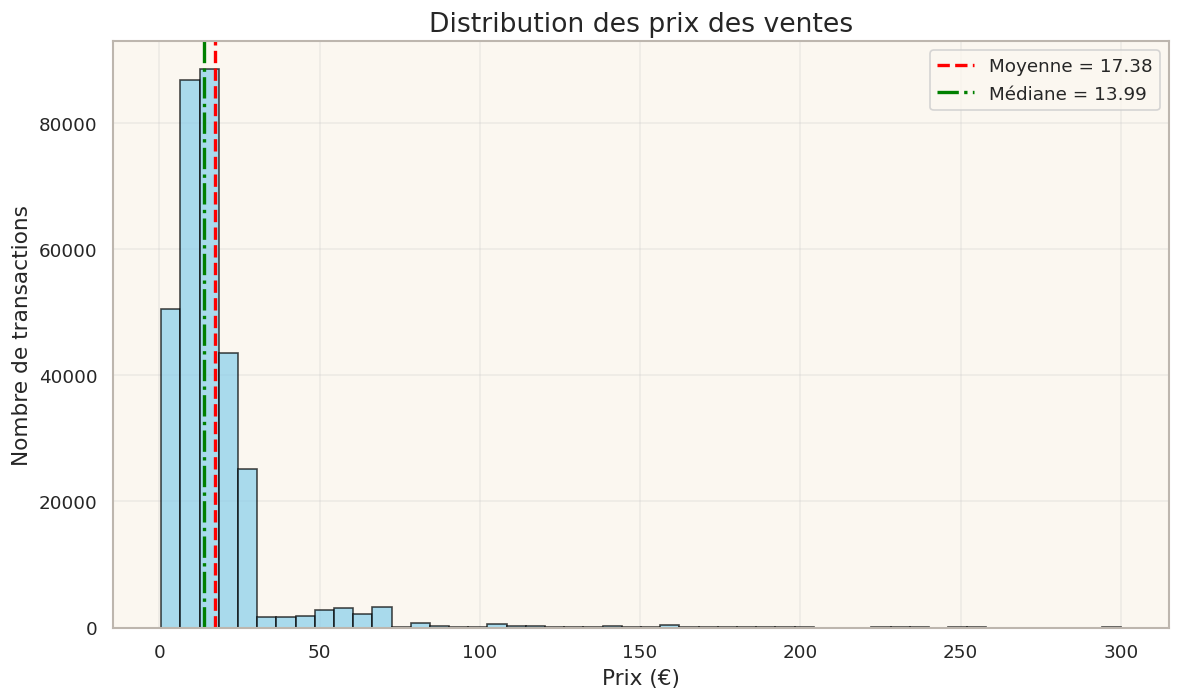

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df["price"], bins=50, color="skyblue", edgecolor="black", alpha=0.7)

# Ajouter lignes pour moyenne et m√©diane
plt.axvline(df["price"].mean(), color="red", linestyle="--", linewidth=2, label=f"Moyenne = {df['price'].mean():.2f}")
plt.axvline(df["price"].median(), color="green", linestyle="-.", linewidth=2, label=f"M√©diane = {df['price'].median():.2f}")

plt.title("Distribution des prix des ventes")
plt.xlabel("Prix (‚Ç¨)")
plt.ylabel("Nombre de transactions")
plt.legend()
plt.tight_layout()
plt.show()

## 5. Comparaison des ventes selon le sexe

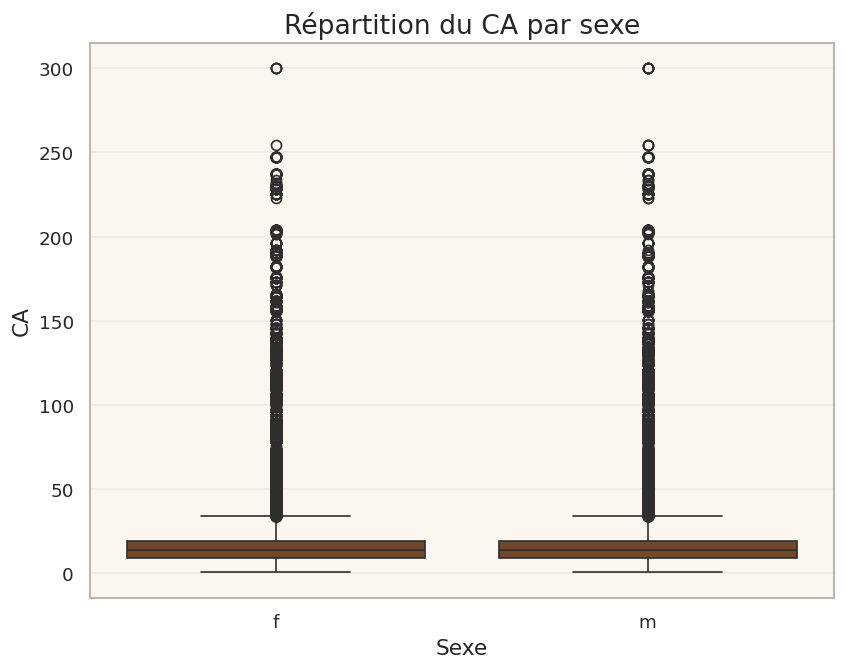

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='sex', y='CA', data=df)
plt.title('R√©partition du CA par sexe')
plt.xlabel('Sexe')
plt.ylabel('CA')
plt.show()

## 6. Analyse temporelle des ventes (par mois)

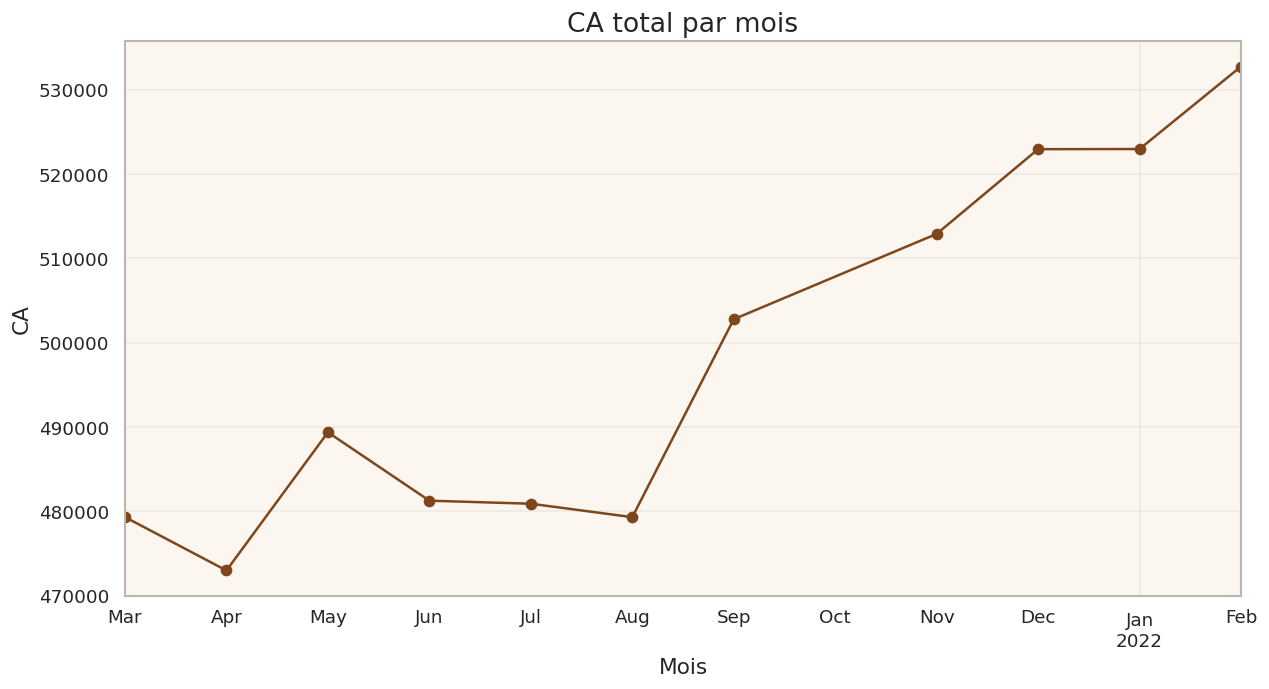

In [ ]:
monthly = df.groupby('month')['CA'].sum()
plt.figure(figsize=(12,6))
monthly.plot(marker='o')
plt.title('CA total par mois')
plt.xlabel('Mois')
plt.ylabel('CA')
plt.grid(True)
plt.show()

## 7. Analyse des ventes par cat√©gorie de produit

/tmp/ipython-input-2812670755.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='categ', y='CA', data=df, estimator=sum, ci=None)


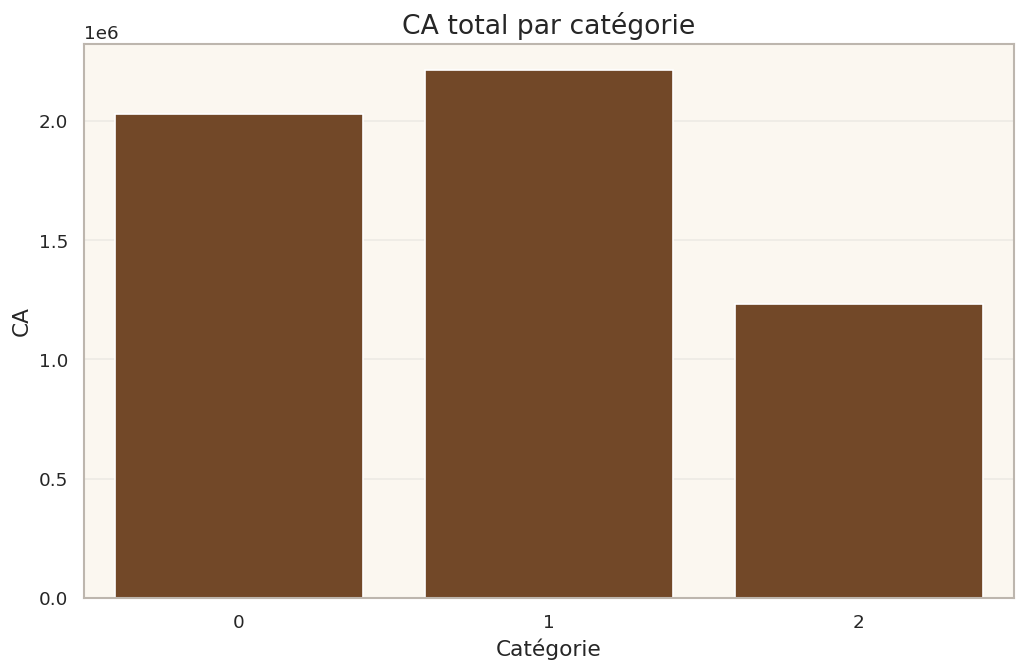

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='categ', y='CA', data=df, estimator=sum, ci=None)
plt.title('CA total par cat√©gorie')
plt.xlabel('Cat√©gorie')
plt.ylabel('CA')
plt.show()

## Conclusion
- Les ventes sont concentr√©es sur quelques transactions (indice de Gini √©lev√©).
- La majorit√© des montants de vente sont faibles.
- Il existe des pics mensuels dans le chiffre d‚Äôaffaires.
- Les femmes et hommes ach√®tent de fa√ßon similaire en moyenne.
- Certains types de produits g√©n√®rent plus de revenus que d'autres.

**Recommandation :** cibler les cat√©gories et p√©riodes les plus rentables, et fid√©liser les gros acheteurs.

## R√©partition des √¢ges des clients

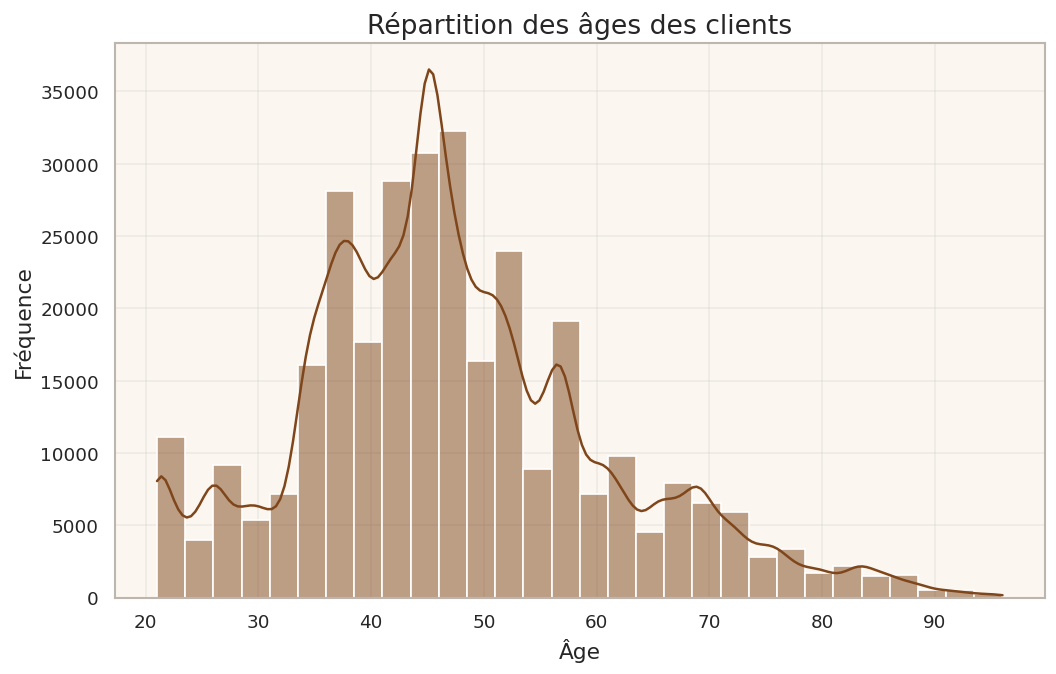

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('R√©partition des √¢ges des clients')
plt.xlabel('√Çge')
plt.ylabel('Fr√©quence')
plt.grid(True)
plt.show()

## Nombre de produits achet√©s par client

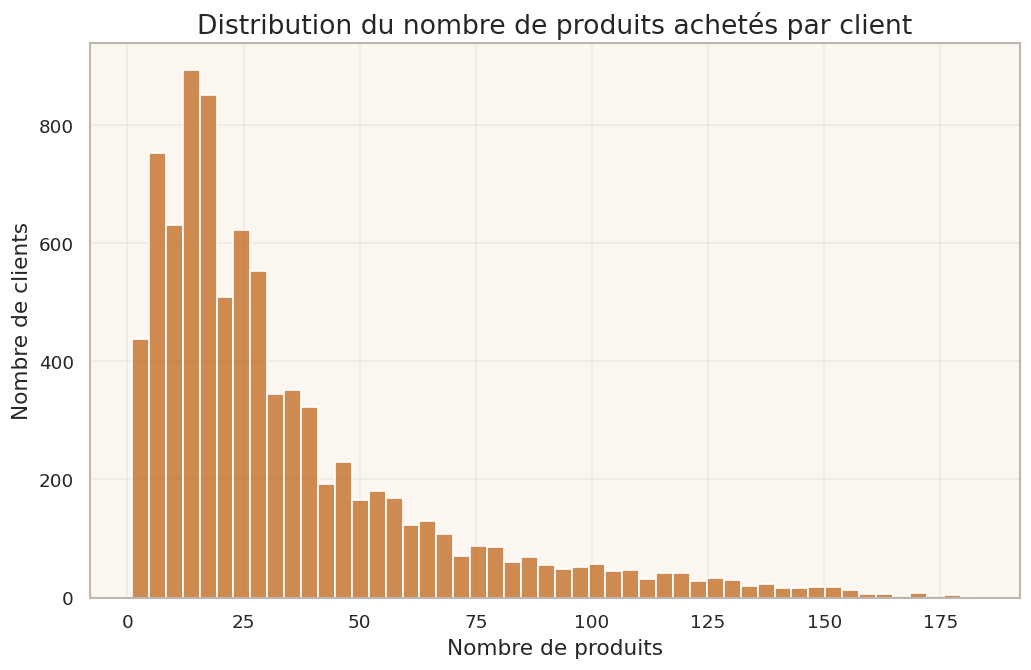

In [ ]:
produits_par_client = df.groupby('client_id')["id_prod"].count()
plt.figure(figsize=(10,6))
sns.histplot(produits_par_client[produits_par_client < 500], bins=50, color="#C1661C")
plt.title("Distribution du nombre de produits achet√©s par client")
plt.xlabel("Nombre de produits")
plt.ylabel("Nombre de clients")
plt.grid(True, alpha=0.3)
plt.show()

## Nombre de transactions par cat√©gorie de produit

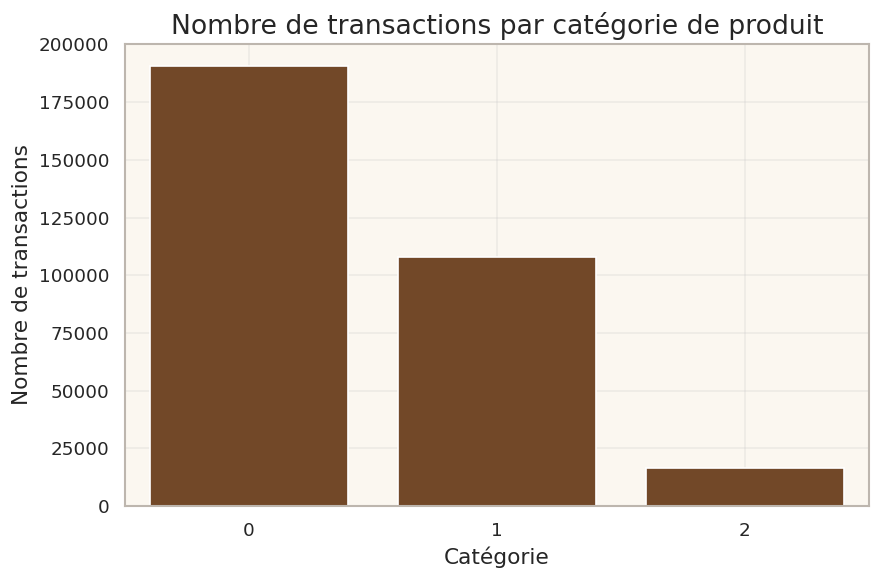

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='categ', data=df)
plt.title('Nombre de transactions par cat√©gorie de produit')
plt.xlabel('Cat√©gorie')
plt.ylabel('Nombre de transactions')
plt.grid(True)
plt.show()

## R√©partition des prix par cat√©gorie de produit

## Chiffre d'affaires moyen par client

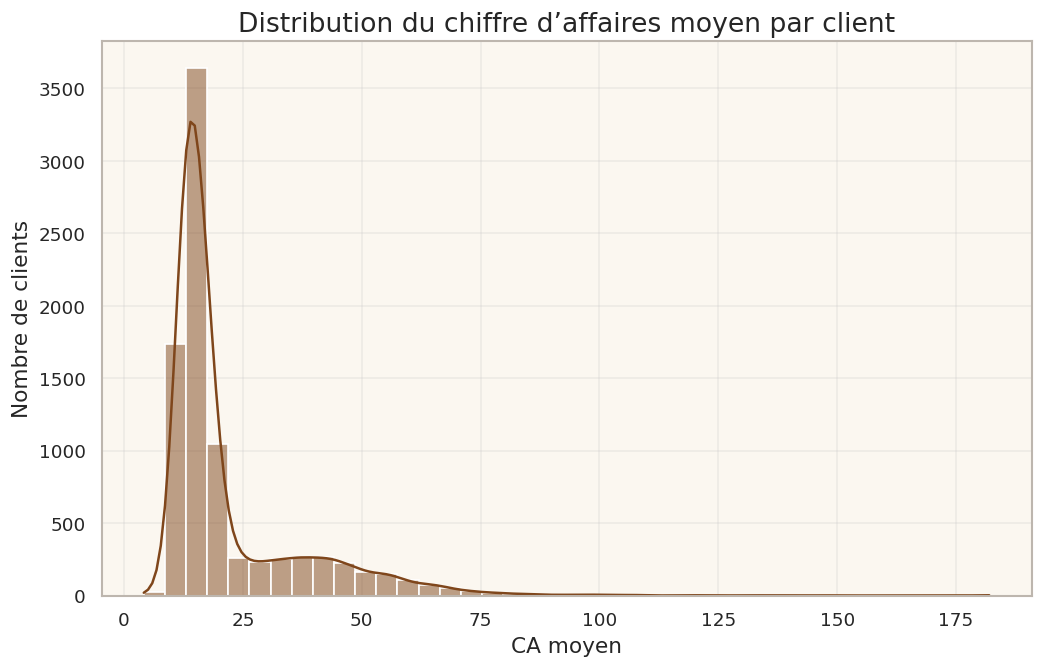

In [ ]:
ca_moyen = df.groupby('client_id')['CA'].mean()
plt.figure(figsize=(10,6))
sns.histplot(ca_moyen, bins=40, kde=True)
plt.title('Distribution du chiffre d‚Äôaffaires moyen par client')
plt.xlabel('CA moyen')
plt.ylabel('Nombre de clients')
plt.grid(True)
plt.show()

## Top 10 clients en termes de chiffre d‚Äôaffaires

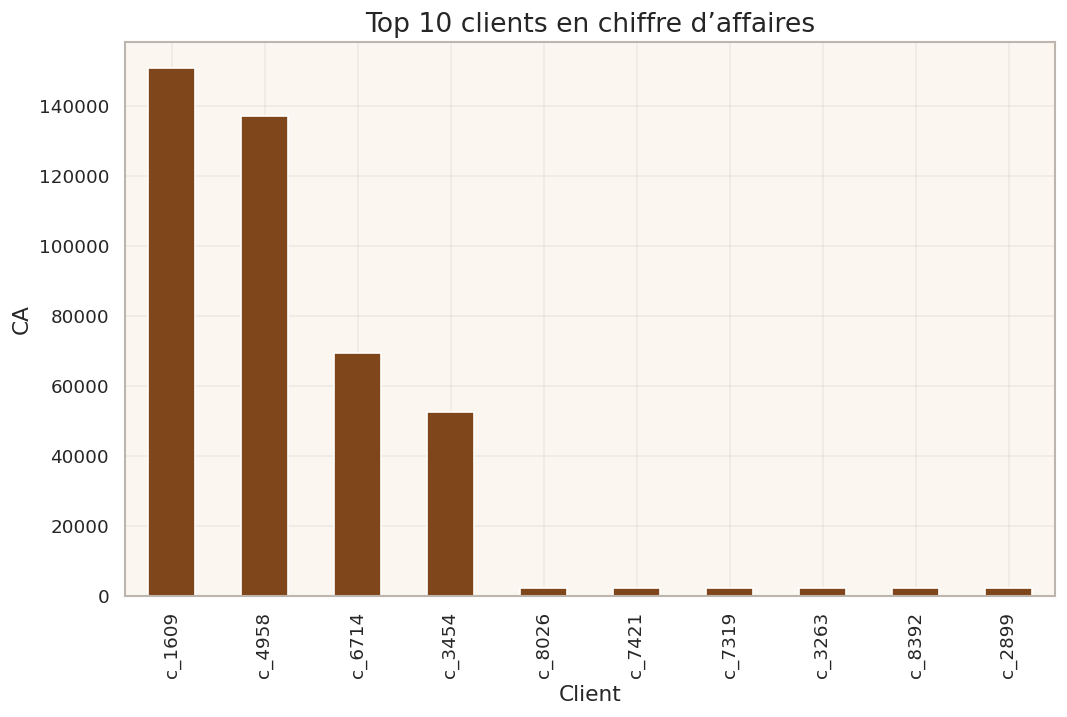

In [ ]:
top_clients = df.groupby('client_id')['CA'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_clients.plot(kind='bar')
plt.title('Top 10 clients en chiffre d‚Äôaffaires')
plt.xlabel('Client')
plt.ylabel('CA')
plt.grid(True)
plt.show()

## Relation entre l‚Äô√¢ge et le chiffre d‚Äôaffaires

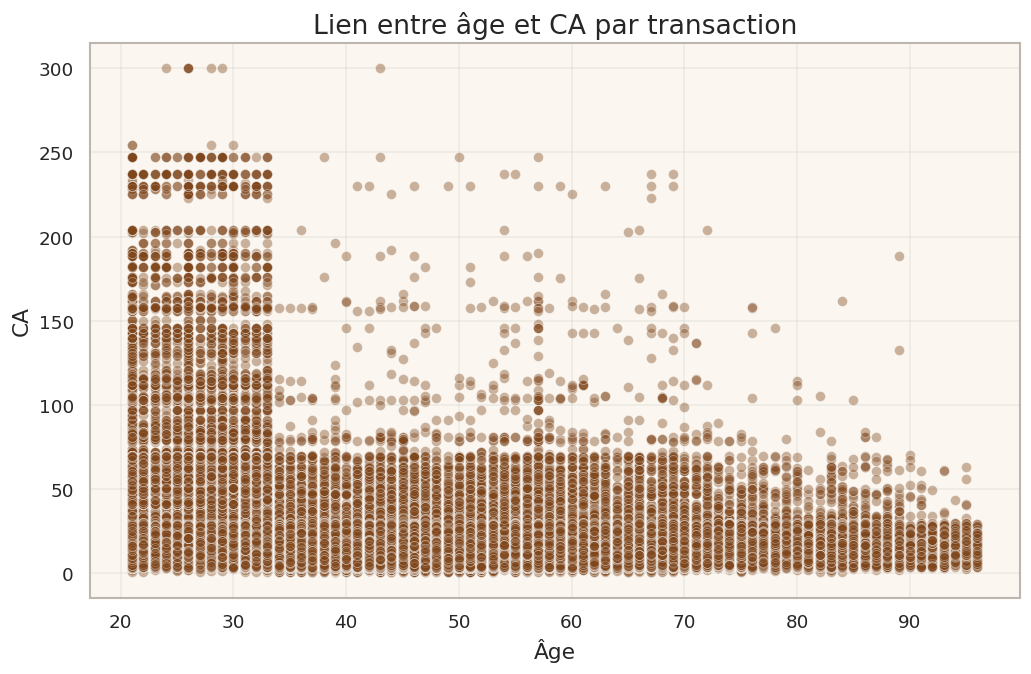

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='CA', data=df, alpha=0.4)
plt.title('Lien entre √¢ge et CA par transaction')
plt.xlabel('√Çge')
plt.ylabel('CA')
plt.grid(True)
plt.show()

## Chiffre d‚Äôaffaires par tranche d‚Äô√¢ge

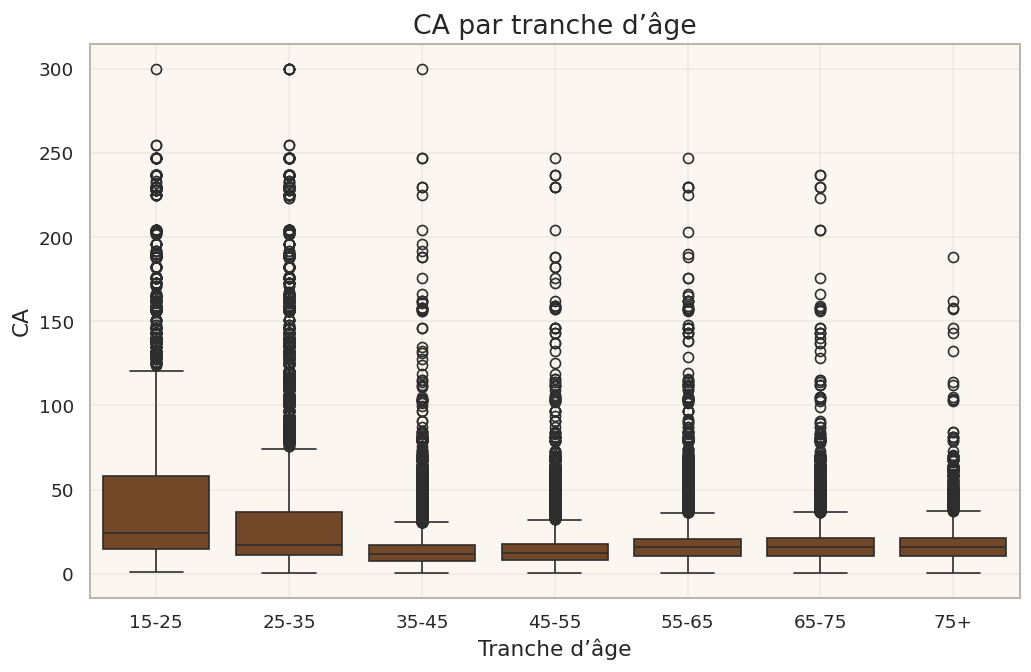

In [ ]:
bins = [15, 25, 35, 45, 55, 65, 75, 100]
labels = ['15-25', '25-35', '35-45', '45-55', '55-65', '65-75', '75+']
df['tranche_age'] = pd.cut(df['age'], bins=bins, labels=labels)
plt.figure(figsize=(10,6))
sns.boxplot(x='tranche_age', y='CA', data=df)
plt.title('CA par tranche d‚Äô√¢ge')
plt.xlabel('Tranche d‚Äô√¢ge')
plt.ylabel('CA')
plt.grid(True)
plt.show()

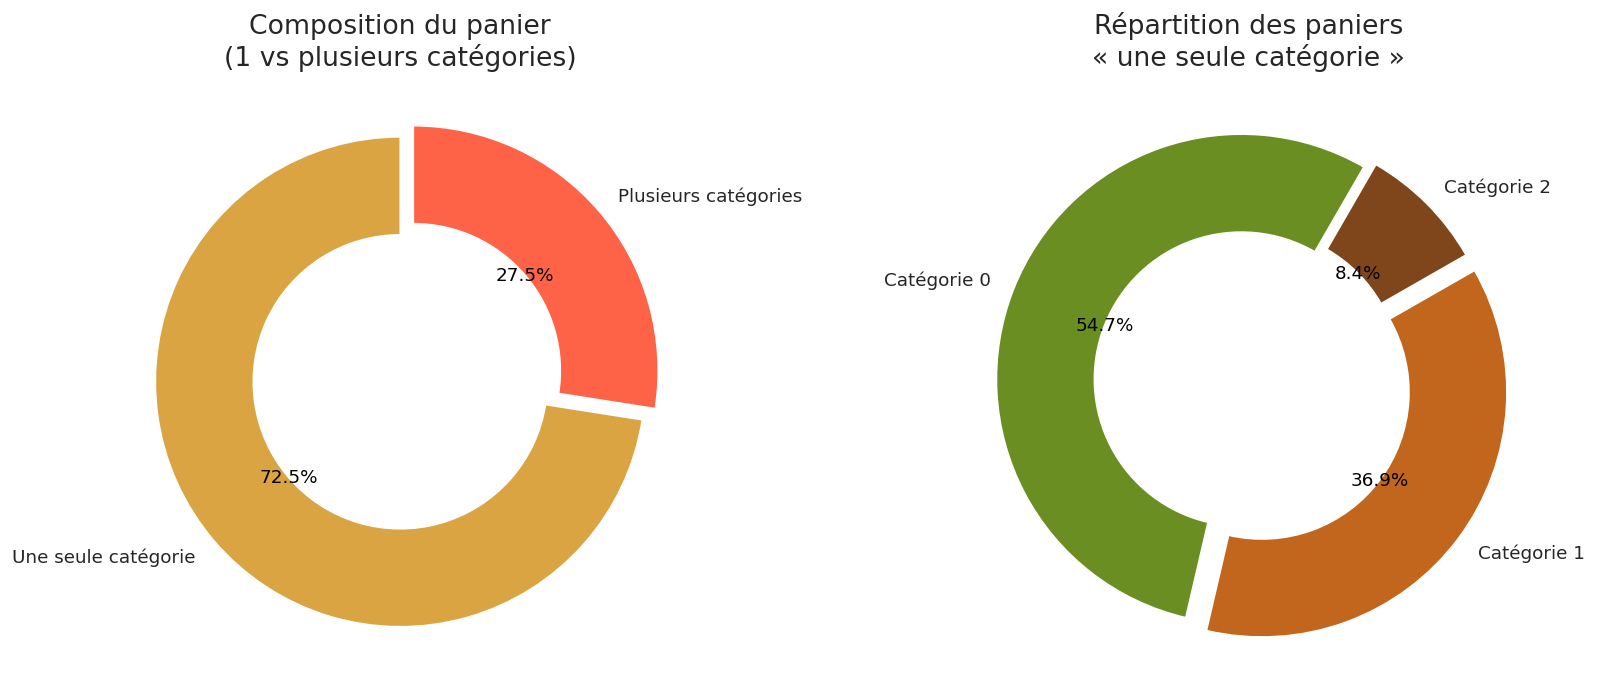

In [ ]:

cats_per_basket = df.groupby("session_id")["categ"].nunique()
n_single = int((cats_per_basket == 1).sum())
n_multi  = int((cats_per_basket > 1).sum())

sizes_left = [n_single, n_multi]
labels_left = ["Une seule cat√©gorie", "Plusieurs cat√©gories"]
colors_left = [PALETTE[2], "tomato"]

# === 2) R√©partition des paniers mono par cat√©gorie ===
single_cat = (
    df.groupby("session_id")["categ"]
      .agg(lambda s: s.iloc[0] if s.nunique()==1 else np.nan)
      .dropna()
      .astype(int)
)
share_single = single_cat.value_counts(normalize=True).reindex([0,1,2]).fillna(0)
sizes_right = share_single.values * 100
labels_right = [f"Cat√©gorie {c}" for c in [0,1,2]]
colors_right = [PALETTE[3], PALETTE[1], PALETTE[0]]

# === 3) Cr√©ation des deux donuts ===
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=120)

# --- Donut 1 : mono vs multi ---
wedges1, texts1, autotexts1 = axes[0].pie(
    sizes_left,
    labels=labels_left,
    autopct="%.1f%%",
    startangle=90,
    explode=(0, 0.07),
    colors=colors_left,
    wedgeprops=dict(width=0.4, edgecolor="white")
)
axes[0].set_title("Composition du panier\n(1 vs plusieurs cat√©gories)")

# --- Donut 2 : r√©partition mono par cat√©gorie ---
wedges2, texts2, autotexts2 = axes[1].pie(
    sizes_right,
    labels=labels_right,
    autopct="%.1f%%",
    startangle=60,
    explode=(0.03, 0.07, 0.03),
    colors=colors_right,
    wedgeprops=dict(width=0.4, edgecolor="white")
)
axes[1].set_title("R√©partition des paniers\n¬´ une seule cat√©gorie ¬ª")

# --- Harmonisation du style ---
for autotexts in [autotexts1, autotexts2]:
    for t in autotexts:
        t.set_color("black")
        t.set_fontsize(11)
for texts in [texts1, texts2]:
    for t in texts:
        t.set_fontsize(11)

plt.tight_layout()
plt.show()

In [ ]:
df['CA'] = df["price"].copy()

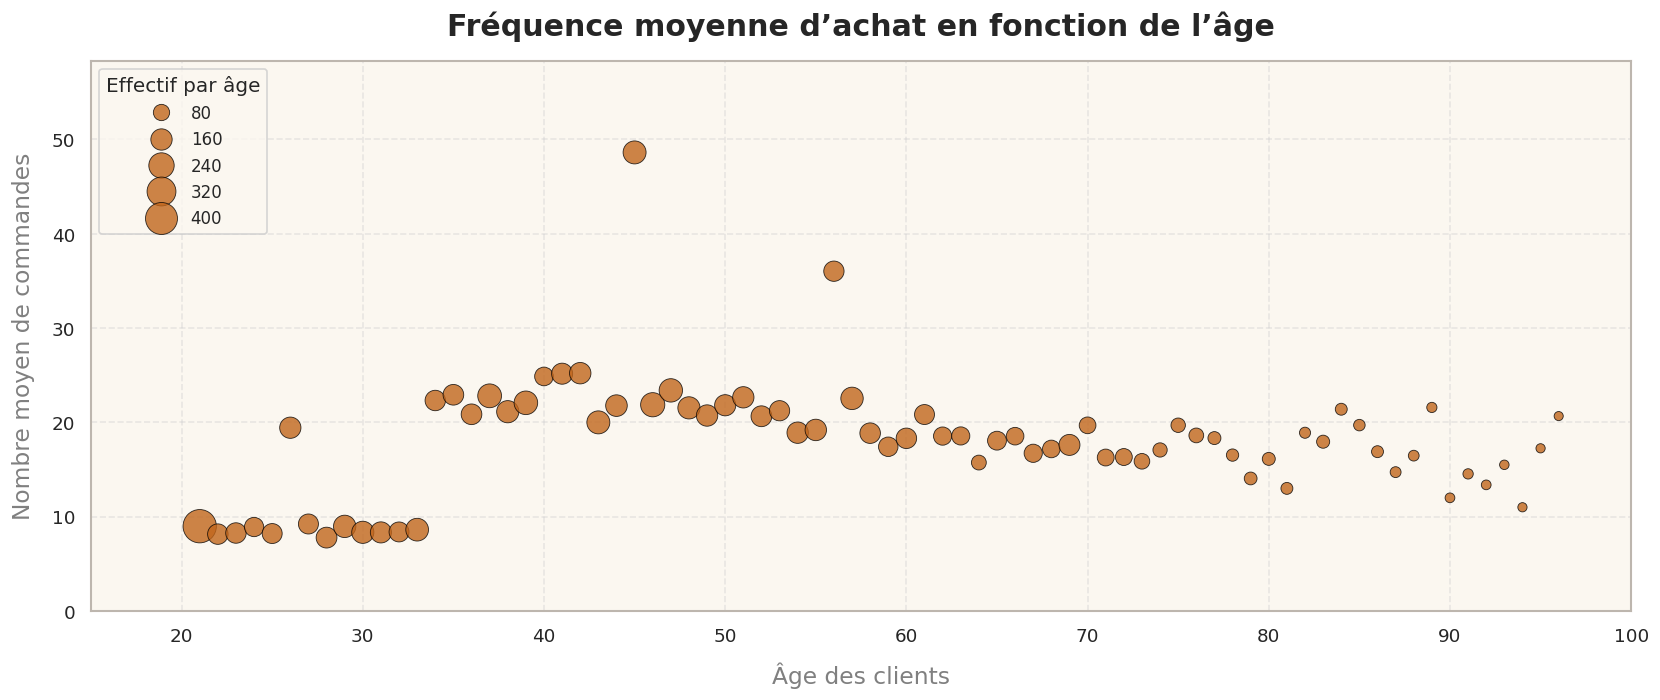

In [ ]:
# --- 1Ô∏è‚É£ Construction de la table freq ---
# Nombre de commandes par client (sessions uniques)
freq_clients = (
    df.groupby("client_id", observed=True)
      .agg(nb_commandes=('session_id', 'nunique'),
           c_age=('age', 'first'))
      .dropna(subset=['c_age'])
      .reset_index(drop=True)
)

# Agr√©gation par √¢ge : effectif + moyenne des commandes
freq = (
    freq_clients.groupby('c_age', observed=True)
    .agg(effectif_age=('c_age', 'count'),
         nb_commandes_moy=('nb_commandes', 'mean'))
    .reset_index()
)

# --- 2Ô∏è‚É£ Visualisation ‚Äî bubble chart (plus intuitif qu‚Äôune droite de r√©gression brute) ---
plt.figure(figsize=(14, 6), dpi=120)

sns.scatterplot(
    data=freq,
    x='c_age', y='nb_commandes_moy',
    size='effectif_age', sizes=(30, 400),
    color='#C1661C', edgecolor='black', alpha=0.8
)

# --- 3Ô∏è‚É£ Finition graphique ---
plt.xlabel("√Çge des clients", fontsize=14, color="gray", labelpad=10)
plt.ylabel("Nombre moyen de commandes", fontsize=14, color="gray", labelpad=10)
plt.title("Fr√©quence moyenne d‚Äôachat en fonction de l‚Äô√¢ge", fontsize=18, weight='bold', pad=15)
plt.grid(linestyle='--', alpha=0.4)
plt.xlim(15, 100)
plt.xticks(np.arange(20, 101, 10))
plt.ylim(0, freq['nb_commandes_moy'].max() * 1.2)
plt.legend(title="Effectif par √¢ge", frameon=True, loc="upper left", fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# Calcul du panier moyen (CA moyen) par √¢ge
freq2 = (
    freq.groupby('c_age', observed=True)['price']
      .mean()
      .reset_index()
      .rename(columns={'price': 'montant_panier'})
)

# --- 2Ô∏è‚É£ Trac√© scatterplot seul ---
plt.figure(figsize=(12, 6), dpi=120)
sns.scatterplot(
    data=r,
    x='c_age',
    y='montant_panier',
    s=70,
    color='#C1661C',        # orange automnal
    edgecolor='black',
    alpha=0.8
)

# --- 3Ô∏è‚É£ Mise en forme esth√©tique ---
plt.xlabel("√Çge des clients", fontsize=14, color="gray", labelpad=10)
plt.ylabel("Montant du panier moyen (‚Ç¨)", fontsize=14, color="gray", labelpad=10)
plt.title("Montant du panier moyen en fonction de l‚Äô√¢ge des clients", fontsize=18, weight='bold', pad=15)

plt.xlim(15, 100)
plt.ylim(0, freq2['montant_panier'].max() * 1.1)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

KeyError: 'Column not found: price'

/tmp/ipython-input-116668553.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


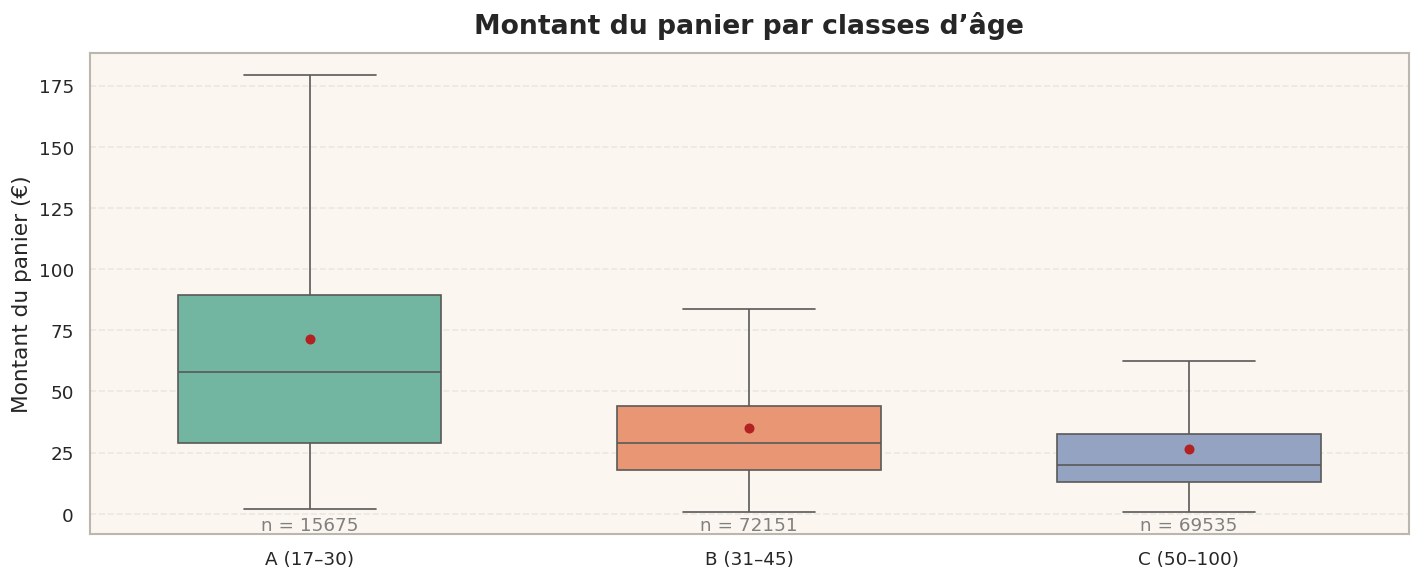

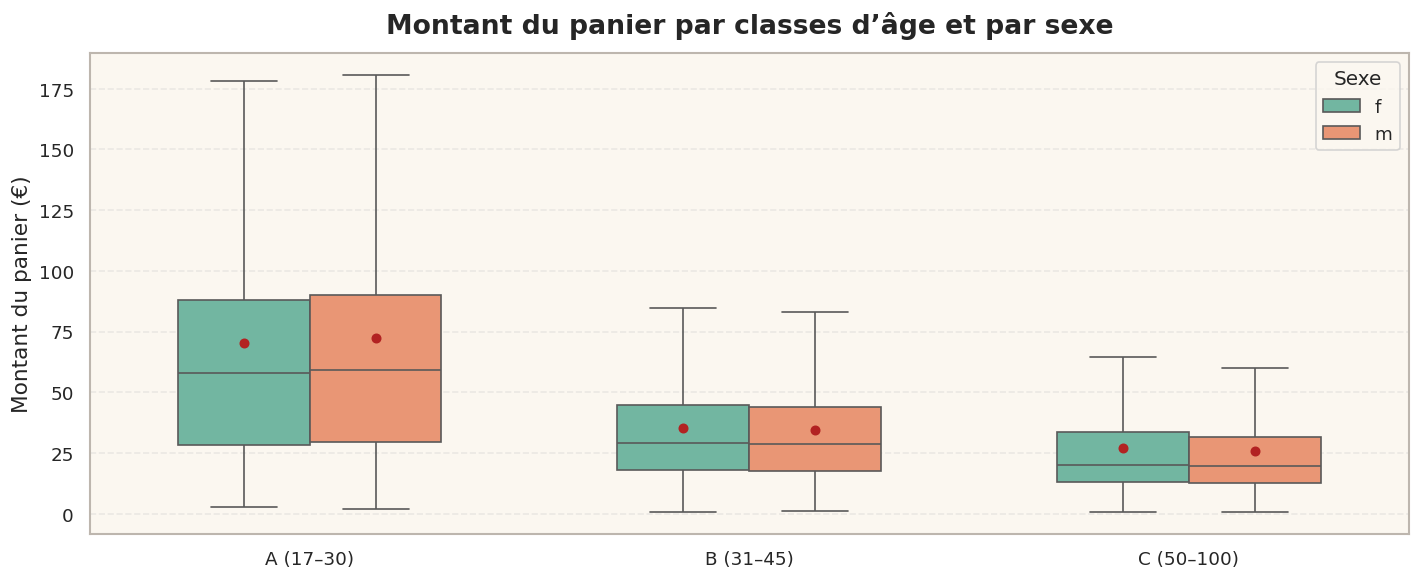

In [ ]:
# 1) Panier par session (somme du CA)
panier = (
    df.groupby("session_id", observed=True)
      .agg(montant_panier=("CA", "sum"),
           age=("age", "first"),
           sex=("sex", "first"))           # adapte si ton sexe est 'c_sex' / 'sex'
      .dropna(subset=["age", "montant_panier"])
      .reset_index(drop=True)
)

# 2) Classes d‚Äô√¢ge (A:17‚Äì29, B:30‚Äì49, C:50‚Äì92)
bins  = [17, 30, 50, 93]
labels = ["A (17‚Äì30)", "B (31‚Äì45)", "C (50‚Äì100)"]
panier["classe"] = pd.cut(panier["age"], bins=bins, right=False, labels=labels)

# 3) BOXPlot principal (meilleure repr√©sentation : lisible, robuste aux outliers)
plt.figure(figsize=(12, 5), dpi=120)
sns.boxplot(
    data=panier, x="classe", y="montant_panier",
    showfliers=False, width=0.6, palette="Set2",
    showmeans=True, meanprops=dict(marker='o', markersize=5, markerfacecolor='firebrick', markeredgecolor='firebrick')
)
plt.title("Montant du panier par classes d‚Äô√¢ge", pad=12, fontsize=16, weight="bold")
plt.xlabel("")
plt.ylabel("Montant du panier (‚Ç¨)")
plt.grid(axis="y", linestyle="--", alpha=0.35)

# Annotation des effectifs n par classe
counts = panier["classe"].value_counts().reindex(labels).fillna(0).astype(int)
for i, lab in enumerate(labels):
    plt.text(i, plt.gca().get_ylim()[0], f"n = {counts.loc[lab]}",
             ha="center", va="bottom", color="gray", fontsize=11)

plt.tight_layout()
plt.show()

# 4) (Optionnel) D√©tail par sexe
plt.figure(figsize=(12, 5), dpi=120)
sns.boxplot(
    data=panier, x="classe", y="montant_panier", hue="sex",
    showfliers=False, width=0.6, palette="Set2",
    showmeans=True, meanprops=dict(marker='o', markersize=5, markerfacecolor='firebrick', markeredgecolor='firebrick')
)
plt.title("Montant du panier par classes d‚Äô√¢ge et par sexe", pad=12, fontsize=16, weight="bold")
plt.xlabel("")
plt.ylabel("Montant du panier (‚Ç¨)")
plt.grid(axis="y", linestyle="--", alpha=0.35)
plt.legend(title="Sexe", frameon=True)
plt.tight_layout()
plt.show()

In [ ]:
client_col = next((col for col in df.columns if "client" in col.lower()), None)
print("üß≠ Colonne client d√©tect√©e :", client_col)

# --- 1Ô∏è‚É£ Calcul de la fr√©quence d'achat par √¢ge ---
freq_clients = (
    df.groupby(client_col, observed=True)
      .agg(nb_commandes=('session_id', 'nunique'),
           age=('age', 'first'))
      .dropna(subset=['age'])
      .reset_index(drop=True)
)

# --- 2Ô∏è‚É£ Moyenne par √¢ge ---
freq_age = (
    freq_clients.groupby('age', observed=True)
    .agg(
        effectif_age=(client_col, 'count'),
        freq_achat_moy=('nb_commandes', 'mean')
    )
    .reset_index()
)

# --- 3Ô∏è‚É£ Visualisation ---
plt.figure(figsize=(12, 6), dpi=120)
sns.scatterplot(
    data=freq_age,
    x='age',
    y='freq_achat_moy',
    size='effectif_age', sizes=(30, 400),
    color='#C1661C', edgecolor='black', alpha=0.8
)

plt.xlabel("√Çge des clients", fontsize=14, color="gray", labelpad=10)
plt.ylabel("Fr√©quence moyenne d'achat (commandes / client)", fontsize=14, color="gray", labelpad=10)
plt.title("Fr√©quence moyenne d‚Äôachat par √¢ge", fontsize=18, weight='bold', pad=15)
plt.grid(linestyle='--', alpha=0.4)
plt.xlim(15, 100)
plt.tight_layout()
plt.show()

üß≠ Colonne client d√©tect√©e : client_id


KeyError: "Column(s) ['client_id'] do not exist"